In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
from sklearn.preprocessing import MinMaxScaler 
import io
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
# features = pd.read_csv('reg_features.csv')  # shape: (N, feature_dim)
# labels = pd.read_csv('labeled_bgl.csv')      # shape: (N,)




In [3]:
X = pd.read_csv('reg_features.csv').values # shape (N, features)
y = pd.read_csv('labeled_bgl.csv')['Label'].values.astype('int32')

    # Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, stratify=y, random_state=42)



In [4]:
X_train 

array([[4.000000e+01, 1.000000e+00, 8.600000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.800000e+01, 1.000000e+00, 9.000000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.200000e+01, 0.000000e+00, 6.800000e+01, ..., 2.707300e+02,
        1.137055e+04, 4.400000e-01],
       ...,
       [4.800000e+01, 0.000000e+00, 6.000000e+01, ..., 3.915000e+02,
        1.174492e+04, 1.000000e-02],
       [3.100000e+01, 1.000000e+00, 5.100000e+01, ..., 8.940600e+02,
        6.437235e+04, 1.000000e-02],
       [5.700000e+01, 1.000000e+00, 1.020000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [5]:
X_test

array([[6.200000e+01, 0.000000e+00, 1.080000e+02, ..., 4.960000e+00,
        1.488400e+02, 1.100000e-01],
       [6.100000e+01, 1.000000e+00, 7.700000e+01, ..., 2.915600e+02,
        1.049626e+04, 2.900000e-01],
       [2.200000e+01, 1.000000e+00, 6.500000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [3.800000e+01, 0.000000e+00, 7.200000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.200000e+01, 1.000000e+00, 6.500000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [6.200000e+01, 0.000000e+00, 7.800000e+01, ..., 1.800000e+00,
        3.602000e+01, 1.730000e+00]])

In [6]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2,

In [7]:
y_test

array([1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 2])

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
X_test 

array([[6.61764706e-01, 0.00000000e+00, 7.60000000e-01, ...,
        2.88407306e-03, 7.06019657e-04, 2.01096892e-02],
       [6.47058824e-01, 1.00000000e+00, 3.46666667e-01, ...,
        1.69532327e-01, 4.97888060e-02, 5.30164534e-02],
       [7.35294118e-02, 1.00000000e+00, 1.86666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.08823529e-01, 0.00000000e+00, 2.80000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.35294118e-02, 1.00000000e+00, 1.86666667e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.61764706e-01, 0.00000000e+00, 3.60000000e-01, ...,
        1.04663942e-03, 1.70860172e-04, 3.16270567e-01]])

In [10]:
X_train 

array([[0.33823529, 1.        , 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [0.60294118, 1.        , 0.52      , ..., 0.        , 0.        ,
        0.        ],
       [0.07352941, 0.        , 0.22666667, ..., 0.15742038, 0.05393598,
        0.08043876],
       ...,
       [0.45588235, 0.        , 0.12      , ..., 0.22764407, 0.0557118 ,
        0.00182815],
       [0.20588235, 1.        , 0.        , ..., 0.5198658 , 0.305349  ,
        0.00182815],
       [0.58823529, 1.        , 0.68      , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
df

,Age,Gender,HR,SPO2,maxBP,minBP,TGS2603_MEAN,TGS2603_IQR,TGS2603_PTP,TGS2603_RMS,...,MQ138_MEAN,MQ138_IQR,MQ138_PTP,MQ138_RMS,MQ138_INT,MQ138_SQ_INT,MQ138_ENERGY,MQ138_POWER,MQ138_BW,Label
0,26.0,0.0,93.0,98.0,120.0,80.0,2.73,0.09,0.13,2.73,...,2.48,0.54,0.75,2.49,2.17,5.43,49.41,395.30,2.76,92.000000
1,64.0,0.0,101.0,98.0,140.0,80.0,2.74,0.09,0.12,2.74,...,2.41,0.11,0.17,2.41,2.14,5.15,52.13,469.13,0.11,301.000000
2,79.0,0.0,71.0,99.0,150.0,70.0,2.74,0.41,1.49,2.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,156.000000
3,65.0,0.0,70.0,97.0,130.0,80.0,2.98,0.05,0.11,2.98,...,2.36,0.15,0.20,2.36,2.22,5.25,94.81,1611.76,0.08,94.000000
4,45.0,0.0,56.0,99.0,110.0,70.0,2.41,0.95,1.69,2.48,...,2.19,0.14,0.23,2.19,2.13,4.67,177.58,6570.33,0.05,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,54.0,0.0,88.0,99.0,175.0,83.0,0.34,0.00,0.00,0.34,...,0.32,0.05,0.07,0.32,0.30,0.10,2.02,40.36,0.54,246.000000
555,48.0,1.0,75.0,98.0,127.0,86.0,0.32,0.04,0.06,0.32,...,0.36,0.08,0.11,0.36,0.34,0.12,2.45,46.47,0.89,108.000000
556,33.0,1.0,86.0,98.0,159.0,80.0,0.31,0.05,0.07,0.31,...,0.36,0.09,0.13,0.36,0.35,0.13,3.94,118.33,0.86,108.593542
557,29.0,0.0,90.0,97.0,126.0,92.0,0.32,0.05,0.07,0.32,...,0.38,0.11,0.16,0.38,0.36,0.14,2.87,57.38,1.68,123.000000


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Label', axis=1), df['Label'], test_size=0.2, random_state=42
)

In [22]:
X_train 


,Age,Gender,HR,SPO2,maxBP,minBP,TGS2603_MEAN,TGS2603_IQR,TGS2603_PTP,TGS2603_RMS,...,TGS822_BW,MQ138_MEAN,MQ138_IQR,MQ138_PTP,MQ138_RMS,MQ138_INT,MQ138_SQ_INT,MQ138_ENERGY,MQ138_POWER,MQ138_BW
182,44.0,0.0,69.0,98.0,114.0,70.0,2.56,0.79,1.29,2.60,...,1.17,2.48,0.42,0.71,2.49,2.44,6.10,359.07,20826.22,0.26
89,49.0,0.0,75.0,99.0,148.0,94.0,1.70,0.90,1.23,1.76,...,0.23,2.64,0.31,0.42,2.64,2.54,6.72,181.35,4715.14,0.19
185,52.0,0.0,88.0,95.0,117.0,76.0,2.45,0.75,1.35,2.50,...,3.77,2.95,0.01,0.01,2.95,2.53,7.48,61.11,427.75,0.00
148,62.0,1.0,67.0,99.0,140.0,70.0,0.70,0.58,0.87,0.77,...,3.83,2.36,0.24,0.35,2.37,2.25,5.34,122.90,2703.86,0.19
204,26.0,1.0,71.0,96.0,107.0,61.0,2.88,0.05,0.07,2.88,...,5.36,2.96,0.87,1.43,3.00,2.88,8.77,310.96,10883.68,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,35.0,0.0,80.0,96.0,112.0,74.0,2.25,0.04,0.06,2.25,...,1.39,2.84,0.53,1.03,2.86,2.79,8.04,399.13,19557.58,0.48
106,36.0,1.0,77.0,94.0,119.0,71.0,1.15,0.06,0.11,1.15,...,0.21,0.80,0.04,0.07,0.80,0.78,0.62,24.99,974.68,0.03
270,70.0,1.0,86.0,98.0,130.0,76.0,1.77,0.30,0.48,1.77,...,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
435,46.0,1.0,88.0,99.0,123.0,83.0,1.15,0.08,0.22,1.15,...,0.09,3.55,0.15,0.21,3.55,3.52,12.50,1649.49,216082.55,0.00


In [23]:
X_test

,Age,Gender,HR,SPO2,maxBP,minBP,TGS2603_MEAN,TGS2603_IQR,TGS2603_PTP,TGS2603_RMS,...,TGS822_BW,MQ138_MEAN,MQ138_IQR,MQ138_PTP,MQ138_RMS,MQ138_INT,MQ138_SQ_INT,MQ138_ENERGY,MQ138_POWER,MQ138_BW
158,65.0,0.0,70.0,97.0,130.0,80.0,2.98,0.05,0.11,2.98,...,0.10,2.36,0.15,0.20,2.36,2.22,5.25,94.81,1611.76,0.08
451,64.0,1.0,74.0,98.0,168.0,103.0,1.05,0.04,0.07,1.05,...,0.05,3.57,0.09,0.24,3.57,3.54,12.63,1363.65,145911.08,0.01
55,44.0,0.0,88.0,96.0,165.0,107.0,1.65,0.85,1.13,1.70,...,1.70,2.65,0.53,0.72,2.66,2.55,6.82,197.17,5520.84,0.50
247,28.0,0.0,66.0,95.0,132.0,78.0,2.12,0.34,0.47,2.13,...,0.26,2.62,0.34,0.47,2.63,2.52,6.64,179.17,4658.41,0.24
70,21.0,0.0,84.0,95.0,104.0,66.0,1.82,1.10,1.52,1.91,...,2.18,3.19,1.07,1.58,3.24,3.11,10.25,423.20,17351.40,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,55.0,1.0,81.0,98.0,122.0,76.0,2.81,0.23,1.55,2.84,...,1.34,2.44,0.23,0.40,2.44,2.32,5.68,124.79,2620.49,0.24
374,57.0,1.0,78.0,98.0,199.0,111.0,0.00,0.00,0.00,0.00,...,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22,22.0,0.0,68.0,96.0,116.0,68.0,3.01,0.09,0.13,3.01,...,2.65,2.52,0.58,0.80,2.54,2.46,6.29,275.31,11838.16,0.41
381,47.0,1.0,74.0,99.0,136.0,84.0,2.00,0.58,0.80,2.02,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [24]:
y_train

182    133.0
89      86.0
185    125.0
148    376.0
204    138.0
       ...  
71     308.0
106    102.0
270    127.0
435    106.0
102     84.0
Name: Label, Length: 447, dtype: float64

In [25]:
y_test

158     94.0
451    136.0
55     104.0
247    124.0
70     138.0
       ...  
11      92.0
374    147.0
22     127.0
381    100.0
373    254.0
Name: Label, Length: 112, dtype: float64

In [ ]:



    # 5. Scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [27]:
X_train 


array([[0.39705882, 0.        , 0.24      , ..., 0.17801299, 0.06748241,
        0.04753199],
       [0.47058824, 0.        , 0.32      , ..., 0.0899063 , 0.01527829,
        0.03473492],
       [0.51470588, 0.        , 0.49333333, ..., 0.03029597, 0.00138602,
        0.        ],
       ...,
       [0.77941176, 1.        , 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [0.42647059, 1.        , 0.49333333, ..., 0.81775321, 0.70016412,
        0.        ],
       [0.36764706, 0.        , 0.17333333, ..., 0.02290417, 0.01032911,
        0.00182815]])

In [28]:

X_test 

array([[0.70588235, 0.        , 0.25333333, ..., 0.04700312, 0.00522253,
        0.01462523],
       [0.69117647, 1.        , 0.30666667, ..., 0.67604482, 0.47279016,
        0.00182815],
       [0.39705882, 0.        , 0.49333333, ..., 0.09774924, 0.01788897,
        0.09140768],
       ...,
       [0.07352941, 0.        , 0.22666667, ..., 0.13648803, 0.03835874,
        0.0749543 ],
       [0.44117647, 1.        , 0.30666667, ..., 0.        , 0.        ,
        0.        ],
       [0.70588235, 1.        , 0.69333333, ..., 0.        , 0.        ,
        0.        ]])

In [3]:
df_features = pd.read_csv('reg_features.csv')
df_labels = pd.read_csv('labeled_bgl.csv')

    # Ensure same ordering and merge
df = pd.concat([df_features.reset_index(drop=True),
                df_labels['Label'].reset_index(drop=True)], axis=1)

    


In [5]:
X = df_features.values  # shape (n_samples, 60)
y = df_labels['Label'].values  # shape (n_samples,)



In [6]:
    # Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, stratify=y, random_state=42)



In [7]:
X_train 

array([[4.000000e+01, 1.000000e+00, 8.600000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.800000e+01, 1.000000e+00, 9.000000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.200000e+01, 0.000000e+00, 6.800000e+01, ..., 2.707300e+02,
        1.137055e+04, 4.400000e-01],
       ...,
       [4.800000e+01, 0.000000e+00, 6.000000e+01, ..., 3.915000e+02,
        1.174492e+04, 1.000000e-02],
       [3.100000e+01, 1.000000e+00, 5.100000e+01, ..., 8.940600e+02,
        6.437235e+04, 1.000000e-02],
       [5.700000e+01, 1.000000e+00, 1.020000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [51]:
    # Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [52]:
    # One-hot encode labels
num_classes = len(np.unique(y))
y_train_oh = tf.one_hot(y_train, num_classes)
y_test_oh = tf.one_hot(y_test, num_classes)

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 noise_input (InputLayer)       [(None, 32)]         0           []                               
                                                                                                  
 label_input (InputLayer)       [(None, 3)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 35)           0           ['noise_input[0][0]',            
                                                                  'label_input[0][0]']            
                                                                                                  
 dense (Dense)                  (None, 128)          4608        ['concatenate[0][0]']    

ValueError: in user code:

    File "C:\Users\suryansh\AppData\Local\Temp\ipykernel_8248\591909148.py", line 119, in train_step  *
        generated_images = self.generator([noise, labels], training=True)
    File "c:\Users\suryansh\anaconda3\envs\cuda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\suryansh\anaconda3\envs\cuda\lib\site-packages\keras\backend.py", line 3572, in concatenate
        return tf.concat([to_dense(x) for x in tensors], axis)

    ValueError: Exception encountered when calling layer "concatenate" "                 f"(type Concatenate).
    
    Shape must be rank 2 but is rank 1 for '{{node generator/concatenate/concat}} = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32](random_normal, generator/Cast, generator/concatenate/concat/axis)' with input shapes: [32,32], [32], [].
    
    Call arguments received by layer "concatenate" "                 f"(type Concatenate):
      • inputs=['tf.Tensor(shape=(32, 32), dtype=float32)', 'tf.Tensor(shape=(32,), dtype=float32)']


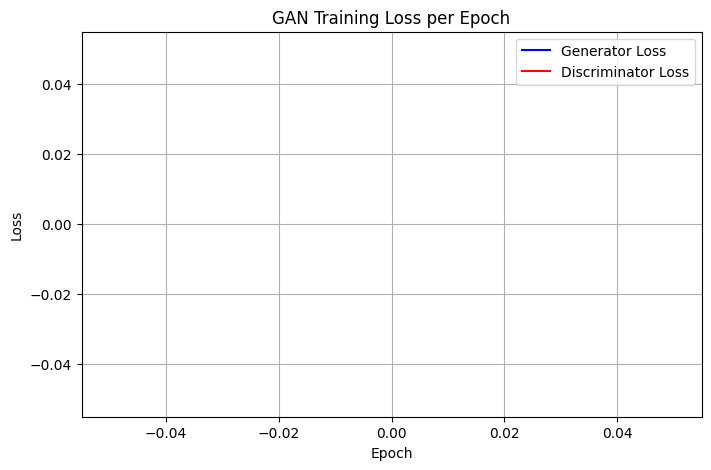

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
from sklearn.preprocessing import MinMaxScaler 
import io
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

NOISE_DIM = 32
EPOCHS = 1000
BATCH_SIZE = 32
BUFFER_SIZE = 1024 
# TARGET_SAMPLES_PER_CLASS = 500 

class BGLGAN:
    def __init__(self, noise_dim, num_classes, bgl_feature_dim):
        """
        Initializes the BGLGAN with generator and discriminator models.

        Args:
            noise_dim (int): Dimension of the random noise vector.
            num_classes (int): Number of unique classes (0, 1, 2).

        """
        self.noise_dim = noise_dim
        self.num_classes = num_classes
        self.bgl_feature_dim = bgl_feature_dim

        # Build generator and discriminator
        self.generator = self._build_generator()
        self.discriminator = self._build_discriminator()

        # Define optimizers
        self.generator_optimizer = optimizers.Adam(1e-4)
        self.discriminator_optimizer = optimizers.Adam(1e-5)

        # Define loss function
        self.cross_entropy = losses.BinaryCrossentropy(from_logits=True)

    def _build_generator(self):
        """
        Builds the generator model.
        Input: Noise vector concatenated with one-hot encoded class label.
        Output: Scaled BGL value.
        """
        noise_input = layers.Input(shape=(self.noise_dim,), name='noise_input')
        label_input = layers.Input(shape=(self.num_classes,), name='label_input')

        # Concatenate noise and label for conditional generation
        combined_input = layers.concatenate([noise_input, label_input], axis=-1)

        x = layers.Dense(128, activation='relu')(combined_input)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(512, activation='relu')(x)
        x = layers.BatchNormalization()(x)
     
        output_bgl = layers.Dense(self.bgl_feature_dim, activation='sigmoid')(x)

        model = Model(inputs=[noise_input, label_input], outputs=output_bgl, name='generator')
        model.summary()
        return model

    def _build_discriminator(self):
        """
        Builds the discriminator model.
        Input: Scaled BGL value concatenated with one-hot encoded class label.
        Output: Probability (real or fake).
        """
        bgl_input = layers.Input(shape=(self.bgl_feature_dim,), name='bgl_input')
        label_input = layers.Input(shape=(self.num_classes,), name='label_input')

        # Concatenate BGL and label for conditional discrimination
        combined_input = layers.concatenate([bgl_input, label_input], axis=-1)

        x = layers.Dense(512, activation='relu')(combined_input)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(128, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
      
        output_prob = layers.Dense(1)(x)

        model = Model(inputs=[bgl_input, label_input], outputs=output_prob, name='discriminator')
        model.summary()
        return model

    def discriminator_loss(self, real_output, fake_output):
        """Calculates the discriminator's loss."""
        # real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        # fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        # In discriminator_loss
        real_loss = self.cross_entropy(tf.random.uniform(tf.shape(real_output), minval=0.7, maxval=1.2), real_output) # e.g., target 0.7-1.2 instead of 1.0
        fake_loss = self.cross_entropy(tf.random.uniform(tf.shape(fake_output), minval=0.0, maxval=0.3), fake_output) # e.g., target 0.0-0.3 instead of 0.0
        total_loss = (real_loss + fake_loss ) / 2
        return total_loss

    def generator_loss(self, fake_output):
        """Calculates the generator's loss."""
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    @tf.function
    def train_step(self, images, labels):
        """
        Performs one training step for the GAN.

        Args:
            images (tf.Tensor): Batch of real scaled BGL values.
            labels (tf.Tensor): Batch of one-hot encoded labels corresponding to real BGLs.
        """
        batch_size = tf.shape(images)[0]
        noise = tf.random.normal([batch_size, self.noise_dim])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = self.generator([noise, labels], training=True)

            real_output = self.discriminator([images, labels], training=True)
            fake_output = self.discriminator([generated_images, labels], training=True)

            gen_loss = self.generator_loss(fake_output)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        return gen_loss, disc_loss

    def train(self, dataset, epochs):
        """
        Trains the GAN model and plots generator and discriminator losses after each epoch.
    
        Args:
            dataset (tf.data.Dataset): The preprocessed dataset (scaled BGL, one-hot labels).
            epochs (int): Number of training epochs.
        """
        print(f"Starting training for {epochs} epochs...")

        gen_loss_history = []
        disc_loss_history = []

        # Enable interactive mode
        plt.ion()
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.set_title("GAN Training Loss per Epoch")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        gen_line, = ax.plot([], [], label="Generator Loss", color='blue')
        disc_line, = ax.plot([], [], label="Discriminator Loss", color='red')
        ax.legend()
        ax.grid(True)

        for epoch in range(epochs):
            gen_loss_sum = 0
            disc_loss_sum = 0
            batch_count = 0

            for image_batch, label_batch in dataset:
                gen_loss, disc_loss = self.train_step(image_batch, label_batch)
                gen_loss_sum += gen_loss.numpy()  # convert to float
                disc_loss_sum += disc_loss.numpy()
                batch_count += 1

            avg_gen_loss = gen_loss_sum / batch_count
            avg_disc_loss = disc_loss_sum / batch_count

            gen_loss_history.append(avg_gen_loss)
            disc_loss_history.append(avg_disc_loss)

            # Update plot after each epoch
            gen_line.set_data(range(1, len(gen_loss_history) + 1), gen_loss_history)
            disc_line.set_data(range(1, len(disc_loss_history) + 1), disc_loss_history)
            ax.set_xlim(1, epochs)
            ax.set_ylim(0, max(max(gen_loss_history), max(disc_loss_history)) * 1.1)
            fig.canvas.draw()
            fig.canvas.flush_events()

            print(f"Epoch {epoch + 1}/{epochs} - Gen Loss: {avg_gen_loss:.4f}, Disc Loss: {avg_disc_loss:.4f}")

        print("Training complete.")
        plt.ioff()
        plt.show()
    

    # def generate_samples(self, num_samples, class_label_index, scaler):
    #     """
    #     Generates synthetic BGL samples for a specific class.

    #     Args:
    #         num_samples (int): Number of samples to generate.
    #         class_label_index (int): The integer index of the class (0, 1, or 2).
    #         scaler (MinMaxScaler): The scaler used for original data to inverse transform.

    #     Returns:
    #         np.ndarray: An array of inverse-transformed synthetic BGL values.
    #     """
    #     noise = tf.random.normal([num_samples, self.noise_dim])
    #     # Create one-hot encoded labels for the desired class
    #     class_labels_one_hot = tf.one_hot([class_label_index] * num_samples, self.num_classes)

    #     generated_bgl = self.generator([noise, class_labels_one_hot], training=False)
    #     return generated_bgl.flatten() # Return as a 1D array


# --- Main Execution ---
if __name__ == "__main__":
    # Simulate fetching file content (replace with actual fetch in production environment)
    # In a real scenario, this would be:
    # file_content = content_fetcher.fetch(
    #     query="labeled_bgl.csv",
    #     source_references=[{"id": "labeled_bgl.csv", "type": "text/csv"}]
    # )
    # For testing, create dummy content or ensure the file is present
    # try:
    #     with open('labeled_bgl.csv', 'r') as f:
    #         file_content = f.read()
    # except FileNotFoundError:
    #     # Create dummy data for demonstration if file not found
    #     print("labeled_bgl.csv not found. Creating dummy data for demonstration.")

    # # Load the CSV data into a pandas DataFrame
    # df = pd.read_csv(io.StringIO(file_content))

    # print("\n--- Original Data Information ---")
    # print("Original DataFrame Info:")
    # df.info()
    # print("\nOriginal Class Distribution:")
    # original_class_counts = df['Label'].value_counts().sort_index()
    # print(original_class_counts)
    # print("\nOriginal BGL min/max:")
    # print(f"Min BGL: {df['BGL'].min()}")
    # print(f"Max BGL: {df['BGL'].max()}")

    # # Separate features (BGL) and labels
    # bgl_data_original = df['BGL'].values.reshape(-1, 1)
    # labels_original = df['Label'].values

    # X = features
    # y = labels

    # Train-test split 


    # Scaling
    # X_train ---> fit_transform
    # X_test ---> transform

    # Training GAN on X_train, y_train
    # Evaluate on X_test, y_test

    # Generate samples in X_train, y_train for class 1, 2

    # add these samples to X_train, y_train

    # Export X_train, y_train to CSV
    # Export X_test, y_test to CSV
        # 1. Load separate CSVs
    

    # Load data
    X = pd.read_csv('reg_features.csv').values  # shape (N, features)
    y = pd.read_csv('labeled_bgl.csv')['Label'].values.astype('int32')

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.2, stratify=y, random_state=42)

    # Scale
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare dataset of integer labels
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

    # Train
    gan = BGLGAN(noise_dim=NOISE_DIM,
                num_classes=3,
                bgl_feature_dim=X_train.shape[1])
    gan.train(train_ds, epochs=1000)

 

Epoch 1/1000 – Gen: 0.5786, Disc: 0.7047
Epoch 2/1000 – Gen: 0.6005, Disc: 0.6987
Epoch 3/1000 – Gen: 0.6115, Disc: 0.6952
Epoch 4/1000 – Gen: 0.6318, Disc: 0.6850
Epoch 5/1000 – Gen: 0.6494, Disc: 0.6811
Epoch 6/1000 – Gen: 0.6634, Disc: 0.6755
Epoch 7/1000 – Gen: 0.6746, Disc: 0.6683
Epoch 8/1000 – Gen: 0.6795, Disc: 0.6677
Epoch 9/1000 – Gen: 0.7005, Disc: 0.6588
Epoch 10/1000 – Gen: 0.7034, Disc: 0.6581
Epoch 11/1000 – Gen: 0.7182, Disc: 0.6537
Epoch 12/1000 – Gen: 0.7212, Disc: 0.6516
Epoch 13/1000 – Gen: 0.7326, Disc: 0.6483
Epoch 14/1000 – Gen: 0.7451, Disc: 0.6394
Epoch 15/1000 – Gen: 0.7601, Disc: 0.6335
Epoch 16/1000 – Gen: 0.7619, Disc: 0.6345
Epoch 17/1000 – Gen: 0.7678, Disc: 0.6305
Epoch 18/1000 – Gen: 0.7751, Disc: 0.6289
Epoch 19/1000 – Gen: 0.7882, Disc: 0.6224
Epoch 20/1000 – Gen: 0.8120, Disc: 0.6173
Epoch 21/1000 – Gen: 0.8044, Disc: 0.6181
Epoch 22/1000 – Gen: 0.8165, Disc: 0.6162
Epoch 23/1000 – Gen: 0.8216, Disc: 0.6091
Epoch 24/1000 – Gen: 0.8261, Disc: 0.6124
E

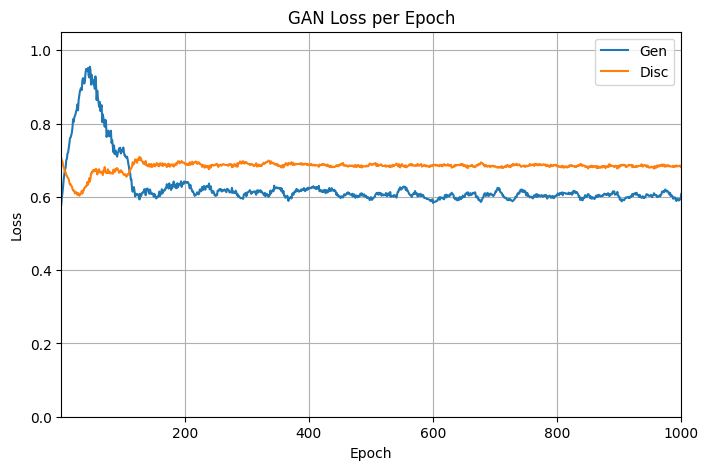

Augmented datasets saved.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
NOISE_DIM = 32
EPOCHS = 1000
BATCH_SIZE = 32
BUFFER_SIZE = 1024

# --- Define BGLGAN with integer labels and Embedding layers ---
class BGLGAN:
    def __init__(self, noise_dim, num_classes, feature_dim, embedding_dim=16):
        self.noise_dim = noise_dim
        self.num_classes = num_classes
        self.feature_dim = feature_dim
        self.embedding_dim = embedding_dim

        self.generator = self._build_generator()
        self.discriminator = self._build_discriminator()

        self.gen_optimizer = optimizers.Adam(1e-4)
        self.disc_optimizer = optimizers.Adam(1e-5)
        self.cross_entropy = losses.BinaryCrossentropy(from_logits=True)

    def _build_generator(self):
        noise_input = layers.Input(shape=(self.noise_dim,), name='noise')
        label_input = layers.Input(shape=(1,), dtype='int32', name='label')
        # Embed label and flatten
        label_emb = layers.Embedding(self.num_classes, self.embedding_dim)(label_input)
        label_emb = layers.Flatten()(label_emb)

        x = layers.Concatenate()([noise_input, label_emb])
        x = layers.Dense(128, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(512, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        output = layers.Dense(self.feature_dim, activation='sigmoid')(x)

        return Model([noise_input, label_input], output, name='generator')

    def _build_discriminator(self):
        feature_input = layers.Input(shape=(self.feature_dim,), name='features')
        label_input = layers.Input(shape=(1,), dtype='int32', name='label')
        # Embed label
        label_emb = layers.Embedding(self.num_classes, self.embedding_dim)(label_input)
        label_emb = layers.Flatten()(label_emb)

        x = layers.Concatenate()([feature_input, label_emb])
        x = layers.Dense(512, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(128, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        output = layers.Dense(1)(x)

        return Model([feature_input, label_input], output, name='discriminator')

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.random.uniform(tf.shape(real_output), 0.7, 1.2), real_output)
        fake_loss = self.cross_entropy(tf.random.uniform(tf.shape(fake_output), 0.0, 0.3), fake_output)
        return (real_loss + fake_loss) / 2

    @tf.function
    def train_step(self, real_features, real_labels):
        batch_size = tf.shape(real_features)[0]
        noise = tf.random.normal([batch_size, self.noise_dim])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            fake_features = self.generator([noise, real_labels], training=True)
            real_out = self.discriminator([real_features, real_labels], training=True)
            fake_out = self.discriminator([fake_features, real_labels], training=True)

            gen_loss = self.generator_loss(fake_out)
            disc_loss = self.discriminator_loss(real_out, fake_out)

        gen_grads = gen_tape.gradient(gen_loss, self.generator.trainable_weights)
        disc_grads = disc_tape.gradient(disc_loss, self.discriminator.trainable_weights)
        self.gen_optimizer.apply_gradients(zip(gen_grads, self.generator.trainable_weights))
        self.disc_optimizer.apply_gradients(zip(disc_grads, self.discriminator.trainable_weights))
        return gen_loss, disc_loss

    def train(self, dataset, epochs):
        plt.ion()
        fig, ax = plt.subplots(figsize=(8,5))
        ax.set_title('GAN Loss per Epoch')
        ax.set_xlabel('Epoch'); ax.set_ylabel('Loss')
        gen_hist, disc_hist = [], []
        gen_line, = ax.plot([], [], label='Gen'); disc_line, = ax.plot([], [], label='Disc')
        ax.legend(); ax.grid(True)

        for epoch in range(1, epochs+1):
            g_sum = d_sum = 0; count = 0
            for x_batch, y_batch in dataset:
                g, d = self.train_step(x_batch, y_batch)
                g_sum += g.numpy(); d_sum += d.numpy(); count += 1
            avg_g, avg_d = g_sum/count, d_sum/count
            gen_hist.append(avg_g); disc_hist.append(avg_d)
            gen_line.set_data(range(1, epoch+1), gen_hist)
            disc_line.set_data(range(1, epoch+1), disc_hist)
            ax.set_xlim(1, epochs)
            ax.set_ylim(0, max(max(gen_hist), max(disc_hist))*1.1)
            fig.canvas.draw(); fig.canvas.flush_events()
            print(f'Epoch {epoch}/{epochs} – Gen: {avg_g:.4f}, Disc: {avg_d:.4f}')
        plt.ioff(); plt.show()

    def generate_samples(self, num_samples, class_label, scaler):
        noise = tf.random.normal([num_samples, self.noise_dim])
        labels = tf.convert_to_tensor([[class_label]] * num_samples)
        fake = self.generator([noise, labels], training=False).numpy()
        inv = scaler.inverse_transform(fake)
        return inv


if __name__ == '__main__':
    # Load data
    X = pd.read_csv('reg_features.csv').values  # shape (N, features)
    y = pd.read_csv('labeled_bgl.csv')['Label'].values.astype('int32')

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.2, stratify=y, random_state=42)

    # Scale
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Prepare dataset of integer labels
    train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

    # Train
    gan = BGLGAN(noise_dim=NOISE_DIM,
                num_classes=3,
                feature_dim=X_train.shape[1])
    gan.train(train_ds, epochs=1000)

 

Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 35)           0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 128)          4608        ['concatenate[0][0]']    

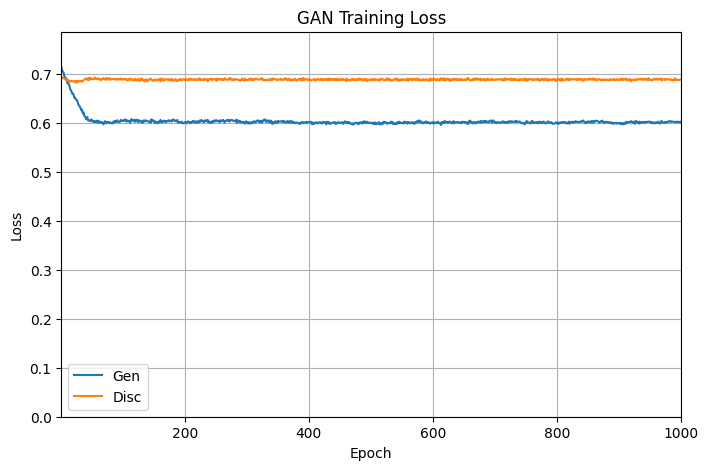

Data generation complete!
Augmented training set size: 1047 samples
Test set size: 112 samples


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Hyper-parameters
NOISE_DIM = 32
NUM_CLASSES = 3            # 3 labels: 0,1,2
BGL_FEATURE_DIM = 60       # update to the number of columns in reg_labels.csv
EPOCHS = 1000
BATCH_SIZE = 32
BUFFER_SIZE = 1024

class BGLGAN:
    def __init__(self, noise_dim, num_classes, bgl_feature_dim):
        self.noise_dim = noise_dim
        self.num_classes = num_classes
        self.bgl_feature_dim = bgl_feature_dim

        self.generator = self._build_generator()
        self.discriminator = self._build_discriminator()

        self.gen_opt = optimizers.Adam(1e-4)
        self.disc_opt = optimizers.Adam(1e-5)
        self.cross_entropy = losses.BinaryCrossentropy(from_logits=True)

    def _build_generator(self):
        noise = layers.Input((self.noise_dim,))
        label = layers.Input((self.num_classes,))
        combined_input = layers.concatenate([noise, label], axis=-1)

        x = layers.Dense(128, activation='relu')(combined_input)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(512, activation='relu')(x)
        x = layers.BatchNormalization()(x)
     
        output_bgl = layers.Dense(self.bgl_feature_dim, activation='sigmoid')(x)

        model = Model(inputs=[noise, label], outputs=output_bgl, name='generator')
        model.summary()
        return model

    def _build_discriminator(self):
        bgl_input = layers.Input((self.bgl_feature_dim,))
        label = layers.Input((self.num_classes,))
        # Concatenate BGL and label for conditional discrimination
        combined_input = layers.concatenate([bgl_input, label], axis=-1)

        x = layers.Dense(512, activation='relu')(combined_input)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(256, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.Dense(128, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
      
        output_prob = layers.Dense(1)(x)

        model = Model(inputs=[bgl_input, label], outputs=output_prob, name='discriminator')
        model.summary()
        return model

    def generator_loss(self, fake_output):
        return self.cross_entropy(tf.ones_like(fake_output), fake_output)

    def discriminator_loss(self, real_output, fake_output):
        # label smoothing / noisy labels
        real_loss = self.cross_entropy(tf.random.uniform(tf.shape(real_output), minval=0.7, maxval=1.2), real_output)
        fake_loss = self.cross_entropy(tf.random.uniform(tf.shape(fake_output), minval=0.0, maxval=0.3), fake_output)
        total_loss = (real_loss + fake_loss ) / 2
        return total_loss

    @tf.function
    def train_step(self, real_bgl, real_labels_onehot):
        noise = tf.random.normal([tf.shape(real_bgl)[0], self.noise_dim])
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            fake_bgl = self.generator([noise, real_labels_onehot], training=True)
            real_output = self.discriminator([real_bgl, real_labels_onehot], training=True)
            fake_output = self.discriminator([fake_bgl, real_labels_onehot], training=True)

            g_loss = self.generator_loss(fake_output)
            d_loss = self.discriminator_loss(real_output, fake_output)

        grads_g = gen_tape.gradient(g_loss, self.generator.trainable_weights)
        grads_d = disc_tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.gen_opt.apply_gradients(zip(grads_g, self.generator.trainable_weights))
        self.disc_opt.apply_gradients(zip(grads_d, self.discriminator.trainable_weights))
        return g_loss, d_loss

    def train(self, dataset, epochs):
        plt.ion()
        fig, ax = plt.subplots(figsize=(8,5))
        ax.set_xlabel("Epoch"); ax.set_ylabel("Loss")
        ax.set_title("GAN Training Loss")
        gen_line, = ax.plot([], [], label="Gen")
        disc_line, = ax.plot([], [], label="Disc")
        ax.legend(); ax.grid(True)

        g_hist, d_hist = [], []
        for epoch in range(1, epochs+1):
            g_sum = d_sum = 0.0
            batches = 0
            for bgl_batch, labels_batch in dataset:
                g_loss, d_loss = self.train_step(bgl_batch, labels_batch)
                g_sum += g_loss.numpy()
                d_sum += d_loss.numpy()
                batches += 1
            g_avg, d_avg = g_sum/batches, d_sum/batches
            g_hist.append(g_avg); d_hist.append(d_avg)

            # update plot
            gen_line.set_data(range(1, epoch+1), g_hist)
            disc_line.set_data(range(1, epoch+1), d_hist)
            ax.set_xlim(1, epochs)
            ax.set_ylim(0, max(max(g_hist), max(d_hist)) * 1.1)
            fig.canvas.draw(); fig.canvas.flush_events()

            print(f"Epoch {epoch}/{epochs} — Gen: {g_avg:.4f}, Disc: {d_avg:.4f}")

        plt.ioff(); plt.show()


# ———————————— Main ————————————
if __name__ == "__main__":
    # 1) Load datasets
    features_df = pd.read_csv('reg_labels.csv')
    labels_df   = pd.read_csv('labeled_bgl.csv')
    assert len(features_df) == len(labels_df), "Feature and label file must have same number of rows"

    X = features_df.values.astype('float32')
    y = labels_df['Label'].values.astype('int32')

    # 2) Train/test split (stratify to preserve class balance)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 3) Scale features to [0,1]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # 4) Build tf.data.Dataset for training
    y_train_onehot = tf.one_hot(y_train, depth=NUM_CLASSES)
    train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot))
    train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

    # 5) Instantiate and train the GAN
    gan = BGLGAN(NOISE_DIM, NUM_CLASSES, bgl_feature_dim=X.shape[1])
    gan.train(train_ds, epochs=EPOCHS)
    # ... (previous code remains the same)


    
    # # ===== SYNTHETIC DATA GENERATION =====
    # # Generate synthetic data for class 1
    # noise_class1 = tf.random.normal([300, NOISE_DIM])
    # labels_class1 = tf.one_hot([1]*300, depth=NUM_CLASSES)
    # synthetic_class1 = gan.generator([noise_class1, labels_class1], training=False).numpy()

    # # Generate synthetic data for class 2
    # noise_class2 = tf.random.normal([300, NOISE_DIM])
    # labels_class2 = tf.one_hot([2]*300, depth=NUM_CLASSES)
    # synthetic_class2 = gan.generator([noise_class2, labels_class2], training=False).numpy()

    # # Combine synthetic data
    # synthetic_features = np.vstack([synthetic_class1, synthetic_class2])
    # synthetic_labels = np.array([1]*300 + [2]*300)
    

    # # Augment original training data
    # augmented_features = np.vstack([X_train_scaled, synthetic_features])
    # augmented_labels = np.concatenate([y_train, synthetic_labels])

    # # Save augmented training set
    # pd.DataFrame(augmented_features).to_csv('augmented_train_features.csv', index=False)
    # pd.DataFrame(augmented_labels, columns=['Label']).to_csv('augmented_train_labels.csv', index=False)

    # # Save original test set
    # pd.DataFrame(X_test_scaled).to_csv('test_features.csv', index=False)
    # pd.DataFrame(y_test, columns=['Label']).to_csv('test_labels.csv', index=False)


    # ... (previous code remains the same until after GAN training)
    
    # ===== SYNTHETIC DATA GENERATION =====
    # Generate synthetic data for class 1
    noise_class1 = tf.random.normal([300, NOISE_DIM])
    labels_class1 = tf.one_hot([1]*300, depth=NUM_CLASSES)
    synthetic_class1_scaled = gan.generator([noise_class1, labels_class1], training=False).numpy()

    # Generate synthetic data for class 2
    noise_class2 = tf.random.normal([300, NOISE_DIM])
    labels_class2 = tf.one_hot([2]*300, depth=NUM_CLASSES)
    synthetic_class2_scaled = gan.generator([noise_class2, labels_class2], training=False).numpy()

    # Combine synthetic data
    synthetic_scaled = np.vstack([synthetic_class1_scaled, synthetic_class2_scaled])
    synthetic_labels = np.array([1]*300 + [2]*300)

    # Descaling synthetic features to original scale
    synthetic_descaled = scaler.inverse_transform(synthetic_scaled)

    # Augment original training data with synthetic data
    augmented_features = np.vstack([X_train, synthetic_descaled])  # Use original X_train (not scaled)
    augmented_labels = np.concatenate([y_train, synthetic_labels])

    # Save augmented dataset (descaled)
    pd.DataFrame(augmented_features, columns=features_df.columns).to_csv('augmented_train_features.csv', index=False)
    pd.DataFrame(augmented_labels, columns=['Label']).to_csv('augmented_train_labels.csv', index=False)

    # Save original test set (descaled)
    pd.DataFrame(X_test, columns=features_df.columns).to_csv('test_features.csv', index=False)
    pd.DataFrame(y_test, columns=['Label']).to_csv('test_labels.csv', index=False)

    print("Data generation complete!")
    print(f"Augmented training set size: {len(augmented_features)} samples")
    print(f"Test set size: {len(X_test)} samples")



Loading and preprocessing data...
Data Loaded. Number of features: 60, Number of classes: 3

Generator Summary:
Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 35)           0           ['input_4[0][0]',                
                                                                  'input_3[0][0]']                
                                                                             

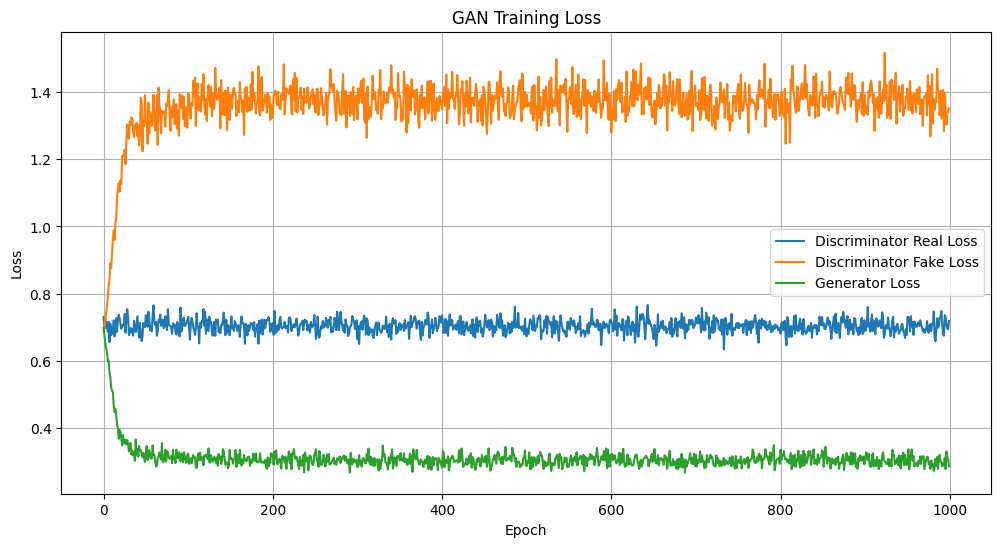

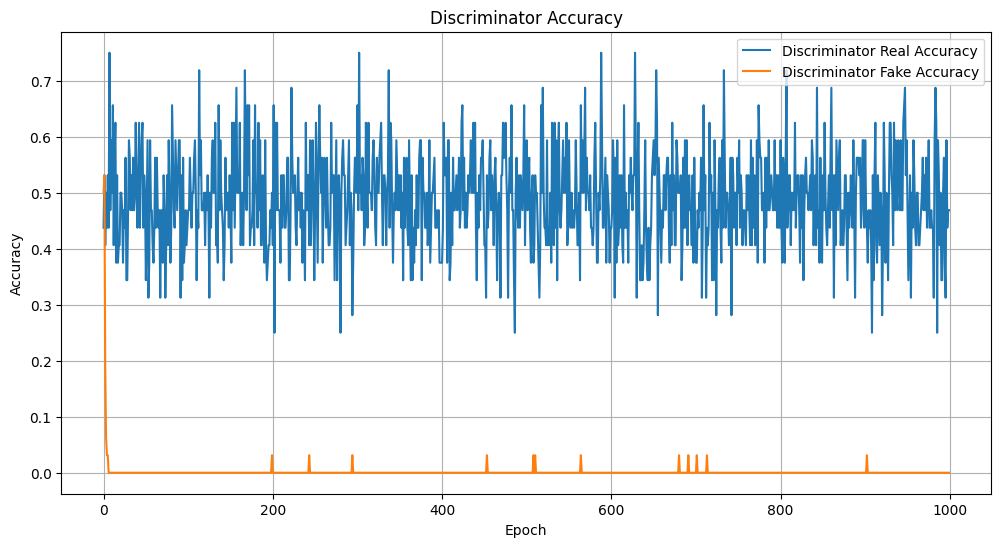

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# import matplotlib.pyplot as plt

# # Clear any previous TensorFlow/Keras sessions to avoid potential conflicts
# # keras.backend.clear_session()

# # --- 1. Load and Preprocess the Dataset ---
# print("Loading and preprocessing data...")
# df = pd.read_csv('combined_dataset.csv')

# # Separate features (X) and labels (y)
# X = df.drop('Label', axis=1)
# y = df['Label']

# # One-hot encode the labels
# encoder = OneHotEncoder(sparse_output=False)
# y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# # Normalize the features to the range [-1, 1] for GAN stability
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_scaled = scaler.fit_transform(X)

# # Get the number of features and number of classes for model definition
# num_features = X_scaled.shape[1]
# num_classes = y_encoded.shape[1]

# print(f"Data Loaded. Number of features: {num_features}, Number of classes: {num_classes}")

# # --- 2. Define Model Parameters ---
# latent_dim = 32  # Dimension of the random noise input to the generator
# epochs = 1000    # Number of training epochs
# batch_size = 32   # Size of the batches used for training

# # --- 3. Define the Generator Model ---
# def define_generator(latent_dim, num_classes, num_features):
#     # Input for labels (one-hot encoded)
#     in_label = layers.Input(shape=(num_classes,))
#     # Input for random noise
#     in_noise = layers.Input(shape=(latent_dim,))

#     # Concatenate label and noise inputs
#     merge = layers.concatenate([in_noise, in_label])

#     # Dense layers for generating features
#     gen = layers.Dense(256)(merge)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.Dense(512)(gen)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.Dense(1024)(gen)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)

#     # Output layer: Generates feature data, 'tanh' activation scales output to [-1, 1]
#     out_layer = layers.Dense(num_features, activation='tanh')(gen)

#     model = keras.Model([in_noise, in_label], out_layer, name='generator')
#     return model

# # --- 4. Define the Discriminator Model ---
# def define_discriminator(num_classes, num_features):
#     # Input for features (real or generated)
#     in_feat = layers.Input(shape=(num_features,))
#     # Input for labels (one-hot encoded)
#     in_label = layers.Input(shape=(num_classes,))

#     # Concatenate feature and label inputs
#     merge = layers.concatenate([in_feat, in_label])

#     # Dense layers for classifying real/fake data
#     dis = layers.Dense(1024)(merge)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.Dense(512)(dis)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.Dense(256)(dis)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)

#     # Output layer: Binary classification (real or fake), 'sigmoid' activation for probability
#     out_layer = layers.Dense(1, activation='sigmoid')(dis)

#     model = keras.Model([in_feat, in_label], out_layer, name='discriminator')
#     return model

# # --- 5. Define the CGAN (Combined) Model ---
# def define_gan(generator, discriminator):
#     # Make the discriminator non-trainable during generator training
#     discriminator.trainable = False

#     # Get generator inputs (noise and label)
#     gen_noise, gen_label = generator.input
#     # Get generator output (fake features)
#     gen_output = generator.output
#     # Connect fake features and labels to the discriminator
#     gan_output = discriminator([gen_output, gen_label])

#     # Create the GAN model: input is generator's input, output is discriminator's output
#     model = keras.Model([gen_noise, gen_label], gan_output, name='cgan')
#     return model

# # Create instances of the models
# discriminator = define_discriminator(num_classes, num_features)
# generator = define_generator(latent_dim, num_classes, num_features)
# gan_model = define_gan(generator, discriminator)

# # --- 6. Compile the Models ---
# # Compile the discriminator separately
# discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
#                       loss='binary_crossentropy',
#                       metrics=['accuracy'])

# # Compile the combined GAN model (generator is trained through this)
# gan_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
#                   loss='binary_crossentropy')

# print("\nGenerator Summary:")
# generator.summary()
# print("\nDiscriminator Summary:")
# discriminator.summary()
# print("\nCGAN Model Summary:")
# gan_model.summary()

# # --- 7. Train the CGAN ---
# print("\nStarting CGAN training...")
# d_loss_real_history = []
# d_loss_fake_history = []
# g_loss_history = []
# d_acc_real_history = []
# d_acc_fake_history = []

# for epoch in range(epochs):
#     # --- Train Discriminator ---
#     # Select a random batch of real data
#     idx = np.random.randint(0, X_scaled.shape[0], batch_size)
#     real_features = X_scaled[idx]
#     real_labels_onehot = y_encoded[idx]

#     # Generate a batch of fake data
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     # Generate random labels for the fake data
#     fake_labels_idx = np.random.randint(0, num_classes, batch_size)
#     fake_labels_onehot = keras.utils.to_categorical(fake_labels_idx, num_classes=num_classes)
#     fake_features = generator.predict([noise, fake_labels_onehot], verbose=0) # suppress output for each predict

#     # Train the discriminator on real and fake samples
#     # Labels for real samples are all ones
#     d_loss_real, d_acc_real = discriminator.train_on_batch([real_features, real_labels_onehot], np.ones((batch_size, 1)))
#     # Labels for fake samples are all zeros
#     d_loss_fake, d_acc_fake = discriminator.train_on_batch([fake_features, fake_labels_onehot], np.zeros((batch_size, 1)))

#     # --- Train Generator ---
#     # Generate random noise and random labels for the generator
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     gen_labels_idx = np.random.randint(0, num_classes, batch_size)
#     gen_labels_onehot = keras.utils.to_categorical(gen_labels_idx, num_classes=num_classes)

#     # Train the generator (it tries to fool the discriminator into classifying its output as real)
#     g_loss = gan_model.train_on_batch([noise, gen_labels_onehot], np.ones((batch_size, 1)))

#     # Record training history
#     d_loss_real_history.append(d_loss_real)
#     d_loss_fake_history.append(d_loss_fake)
#     g_loss_history.append(g_loss)
#     d_acc_real_history.append(d_acc_real)
#     d_acc_fake_history.append(d_acc_fake)

#     # Print progress
#     if epoch % 1000 == 0:
#         print(f"Epoch {epoch}/{epochs} | D_loss_real: {d_loss_real:.4f}, D_acc_real: {d_acc_real:.4f} | D_loss_fake: {d_loss_fake:.4f}, D_acc_fake: {d_acc_fake:.4f} | G_loss: {g_loss:.4f}")

# print("\nCGAN training complete!")

# # --- 8. Plotting Training History ---
# # Plotting the loss history
# plt.figure(figsize=(12, 6))
# plt.plot(d_loss_real_history, label='Discriminator Real Loss')
# plt.plot(d_loss_fake_history, label='Discriminator Fake Loss')
# plt.plot(g_loss_history, label='Generator Loss')
# plt.title('GAN Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.savefig('gan_loss.png')
# print("Loss plot saved as 'gan_loss.png'")


# # Plotting the accuracy history
# plt.figure(figsize=(12, 6))
# plt.plot(d_acc_real_history, label='Discriminator Real Accuracy')
# plt.plot(d_acc_fake_history, label='Discriminator Fake Accuracy')
# plt.title('Discriminator Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.savefig('discriminator_accuracy.png')
# print("Accuracy plot saved as 'discriminator_accuracy.png'")


# # --- 9. Generate Synthetic Data Example ---
# # print("\nGenerating example synthetic data...")
# # # Number of samples to generate
# # num_samples_to_generate = 100
# # # Choose a specific label to generate data for (e.g., label 0)
# # target_label_idx = 0
# # target_label_onehot = keras.utils.to_categorical([target_label_idx] * num_samples_to_generate, num_classes=num_classes)

# # # Generate noise
# # noise_for_generation = np.random.normal(0, 1, (num_samples_to_generate, latent_dim))

# # # Generate features using the trained generator
# # generated_features_scaled = generator.predict([noise_for_generation, target_label_onehot], verbose=0)

# # # Inverse transform the features to their original scale
# # generated_features_original_scale = scaler.inverse_transform(generated_features_scaled)

# # # Create a DataFrame for the generated data
# # generated_df = pd.DataFrame(generated_features_original_scale, columns=X.columns)
# # generated_df['Label'] = encoder.inverse_transform(target_label_onehot)[:, 0].astype(int)

# # print(f"\nFirst 5 rows of generated data for label {target_label_idx}:")
# # print(generated_df.head())

# # # Save the generated data to a CSV file
# # generated_df.to_csv('generated_data.csv', index=False)
# # print("Example generated data saved to 'generated_data.csv'")

# # # --- 10. Save the Trained Models ---
# # try:
# #     generator.save('generator_model.h5')
# #     discriminator.save('discriminator_model.h5')
# #     print("\nGenerator and Discriminator models saved successfully.")
# # except Exception as e:
# #     print(f"\nError saving models: {e}")

Loading and preprocessing data...
Data Loaded. Number of features: 60, Number of classes: 3

Starting CGAN training...
Epoch 0/1000 | D_loss_real: 0.7891, D_acc_real: 0.1875 | D_loss_fake: 0.7057, D_acc_fake: 0.3125 | G_loss: 0.7024
Epoch 1/1000 | D_loss_real: 0.8119, D_acc_real: 0.1562 | D_loss_fake: 0.7171, D_acc_fake: 0.3438 | G_loss: 0.6599
Epoch 2/1000 | D_loss_real: 0.8026, D_acc_real: 0.2188 | D_loss_fake: 0.7365, D_acc_fake: 0.2188 | G_loss: 0.6388
Epoch 3/1000 | D_loss_real: 0.8133, D_acc_real: 0.1562 | D_loss_fake: 0.7645, D_acc_fake: 0.0312 | G_loss: 0.6175
Epoch 4/1000 | D_loss_real: 0.7663, D_acc_real: 0.2500 | D_loss_fake: 0.8069, D_acc_fake: 0.0000 | G_loss: 0.5982
Epoch 5/1000 | D_loss_real: 0.7827, D_acc_real: 0.2188 | D_loss_fake: 0.8559, D_acc_fake: 0.0000 | G_loss: 0.5709
Epoch 6/1000 | D_loss_real: 0.8428, D_acc_real: 0.2500 | D_loss_fake: 0.8817, D_acc_fake: 0.0000 | G_loss: 0.5604
Epoch 7/1000 | D_loss_real: 0.7917, D_acc_real: 0.2812 | D_loss_fake: 0.9032, D_acc

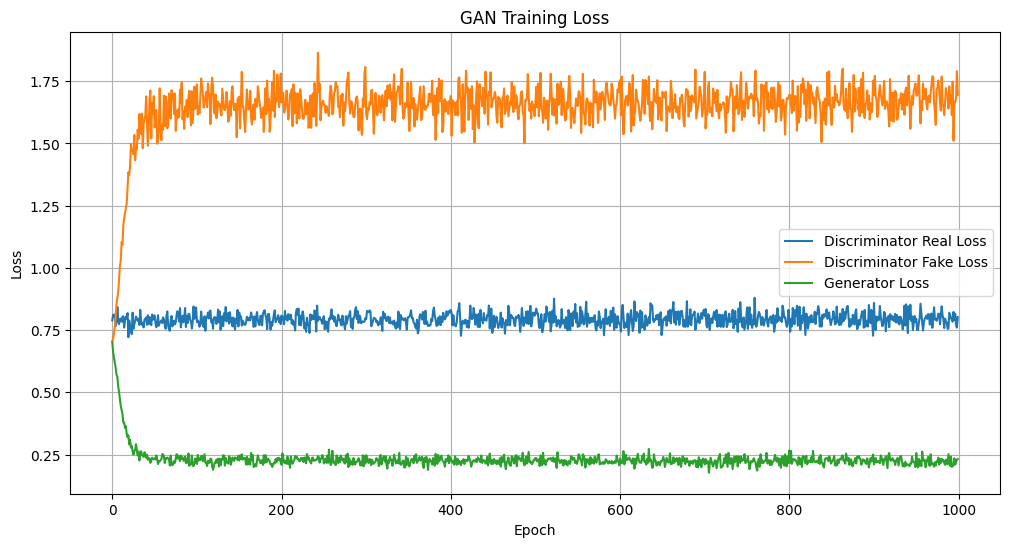

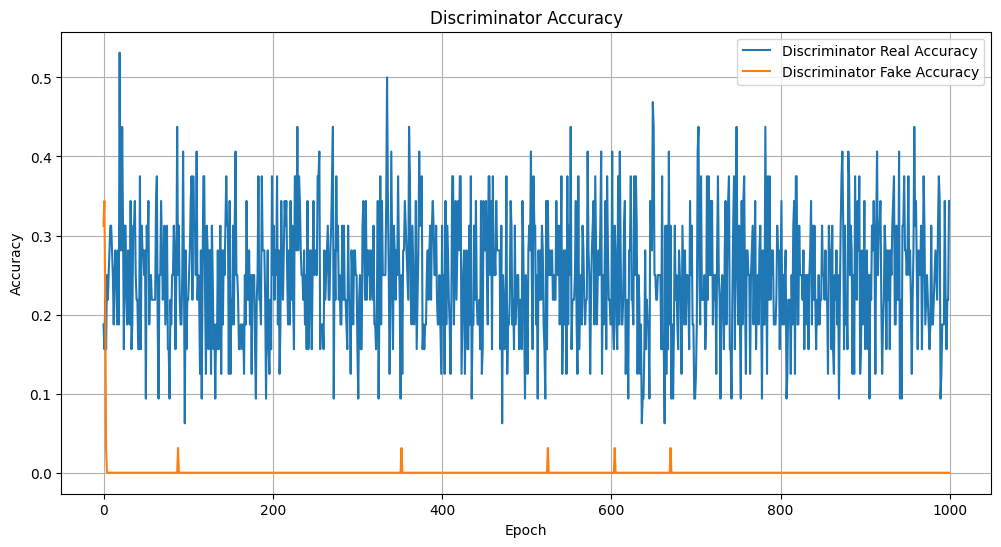

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# import matplotlib.pyplot as plt

# # Clear any previous TensorFlow/Keras sessions to avoid potential conflicts
# keras.backend.clear_session()

# # --- 1. Load and Preprocess the Dataset ---
# print("Loading and preprocessing data...")
# df = pd.read_csv('combined_dataset.csv')

# # Separate features (X) and labels (y)
# X = df.drop('Label', axis=1)
# y = df['Label']

# # One-hot encode the labels
# encoder = OneHotEncoder(sparse_output=False)
# y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# # Normalize the features to the range [-1, 1] for GAN stability
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_scaled = scaler.fit_transform(X)

# # Get the number of features and number of classes for model definition
# num_features = X_scaled.shape[1]
# num_classes = y_encoded.shape[1]

# print(f"Data Loaded. Number of features: {num_features}, Number of classes: {num_classes}")

# # --- 2. Define Model Parameters ---
# latent_dim = 32  # Dimension of the random noise input to the generator
# epochs = 1000    # Number of training epochs
# batch_size = 32   # Size of the batches used for training

# # --- 3. Define the Generator Model ---
# def define_generator(latent_dim, num_classes, num_features):
#     # Input for labels (one-hot encoded)
#     in_label = layers.Input(shape=(num_classes,))
#     # Input for random noise
#     in_noise = layers.Input(shape=(latent_dim,))

#     # Concatenate label and noise inputs
#     merge = layers.concatenate([in_noise, in_label])

#     # Dense layers for generating features
#     gen = layers.Dense(256)(merge)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.Dense(512)(gen)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.Dense(1024)(gen)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)

#     # Output layer: Generates feature data, 'tanh' activation scales output to [-1, 1]
#     out_layer = layers.Dense(num_features, activation='tanh')(gen)

#     model = keras.Model([in_noise, in_label], out_layer, name='generator')
#     return model

# # --- 4. Define the Discriminator Model ---
# def define_discriminator(num_classes, num_features):
#     # Input for features (real or generated)
#     in_feat = layers.Input(shape=(num_features,))
#     # Input for labels (one-hot encoded)
#     in_label = layers.Input(shape=(num_classes,))

#     # Concatenate feature and label inputs
#     merge = layers.concatenate([in_feat, in_label])

#     # Dense layers for classifying real/fake data
#     dis = layers.Dense(1024)(merge)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.Dense(512)(dis)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.Dense(256)(dis)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)

#     # Output layer: Binary classification (real or fake), 'sigmoid' activation for probability
#     out_layer = layers.Dense(1, activation='sigmoid')(dis)

#     model = keras.Model([in_feat, in_label], out_layer, name='discriminator')
#     return model

# # --- 5. Define the CGAN (Combined) Model ---
# def define_gan(generator, discriminator):
#     # Make the discriminator non-trainable during generator training
#     discriminator.trainable = False

#     # Get generator inputs (noise and label)
#     gen_noise, gen_label = generator.input
#     # Get generator output (fake features)
#     gen_output = generator.output
#     # Connect fake features and labels to the discriminator
#     gan_output = discriminator([gen_output, gen_label])

#     # Create the GAN model: input is generator's input, output is discriminator's output
#     model = keras.Model([gen_noise, gen_label], gan_output, name='cgan')
#     return model

# # Create instances of the models
# discriminator = define_discriminator(num_classes, num_features)
# generator = define_generator(latent_dim, num_classes, num_features)
# gan_model = define_gan(generator, discriminator)

# # --- 6. Compile the Models ---
# # Compile the discriminator separately
# discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
#                       loss='binary_crossentropy',
#                       metrics=['accuracy'])

# # Compile the combined GAN model (generator is trained through this)
# gan_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
#                   loss='binary_crossentropy')

# # print("\nGenerator Summary:")
# # generator.summary()
# # print("\nDiscriminator Summary:")
# # discriminator.summary()
# # print("\nCGAN Model Summary:")
# # gan_model.summary()

# # --- 7. Train the CGAN ---
# print("\nStarting CGAN training...")
# d_loss_real_history = []
# d_loss_fake_history = []
# g_loss_history = []
# d_acc_real_history = []
# d_acc_fake_history = []

# for epoch in range(epochs):
#     # --- Train Discriminator ---
#     # Select a random batch of real data
#     idx = np.random.randint(0, X_scaled.shape[0], batch_size)
#     real_features = X_scaled[idx]
#     real_labels_onehot = y_encoded[idx]

#     # Generate a batch of fake data
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     # Generate random labels for the fake data
#     fake_labels_idx = np.random.randint(0, num_classes, batch_size)
#     fake_labels_onehot = keras.utils.to_categorical(fake_labels_idx, num_classes=num_classes)
#     fake_features = generator.predict([noise, fake_labels_onehot], verbose=0) # suppress output for each predict

#     # Train the discriminator on real and fake samples
#     # Labels for real samples are all ones
#     d_loss_real, d_acc_real = discriminator.train_on_batch([real_features, real_labels_onehot], np.ones((batch_size, 1)))
#     # Labels for fake samples are all zeros
#     d_loss_fake, d_acc_fake = discriminator.train_on_batch([fake_features, fake_labels_onehot], np.zeros((batch_size, 1)))

#     # --- Train Generator ---
#     # Generate random noise and random labels for the generator
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     gen_labels_idx = np.random.randint(0, num_classes, batch_size)
#     gen_labels_onehot = keras.utils.to_categorical(gen_labels_idx, num_classes=num_classes)

#     # Train the generator (it tries to fool the discriminator into classifying its output as real)
#     g_loss = gan_model.train_on_batch([noise, gen_labels_onehot], np.ones((batch_size, 1)))

#     # Record training history
#     d_loss_real_history.append(d_loss_real)
#     d_loss_fake_history.append(d_loss_fake)
#     g_loss_history.append(g_loss)
#     d_acc_real_history.append(d_acc_real)
#     d_acc_fake_history.append(d_acc_fake)

#     # Print progress for each epoch
#     print(f"Epoch {epoch}/{epochs} | D_loss_real: {d_loss_real:.4f}, D_acc_real: {d_acc_real:.4f} | D_loss_fake: {d_loss_fake:.4f}, D_acc_fake: {d_acc_fake:.4f} | G_loss: {g_loss:.4f}")

# print("\nCGAN training complete!")

# # --- 8. Plotting Training History ---
# # Plotting the loss history
# plt.figure(figsize=(12, 6))
# plt.plot(d_loss_real_history, label='Discriminator Real Loss')
# plt.plot(d_loss_fake_history, label='Discriminator Fake Loss')
# plt.plot(g_loss_history, label='Generator Loss')
# plt.title('GAN Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)



# # Plotting the accuracy history
# plt.figure(figsize=(12, 6))
# plt.plot(d_acc_real_history, label='Discriminator Real Accuracy')
# plt.plot(d_acc_fake_history, label='Discriminator Fake Accuracy')
# plt.title('Discriminator Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)




# # --- 9. Generate Synthetic Data Example ---
# print("\nGenerating example synthetic data...")
# # Number of samples to generate
# num_samples_to_generate = 300
# # Choose a specific label to generate data for (e.g., label 0)
# target_label_idx = 1
# target_label_onehot = keras.utils.to_categorical([target_label_idx] * num_samples_to_generate, num_classes=num_classes)

# # Generate noise
# noise_for_generation = np.random.normal(0, 1, (num_samples_to_generate, latent_dim))

# # Generate features using the trained generator
# generated_features_scaled = generator.predict([noise_for_generation, target_label_onehot], verbose=0)

# # Inverse transform the features to their original scale
# generated_features_original_scale = scaler.inverse_transform(generated_features_scaled)

# # Create a DataFrame for the generated data
# generated_df = pd.DataFrame(generated_features_original_scale, columns=X.columns)
# generated_df['Label'] = encoder.inverse_transform(target_label_onehot)[:, 0].astype(int)

# # Save the generated data to a CSV file
# generated_df.to_csv('generated_data.csv', index=False)
# print("Example generated data saved to 'generated_data.csv'")

# # --- 10. Save the Trained Models ---
# # try:
# #     generator.save('generator_model.h5')
# #     discriminator.save('discriminator_model.h5')
# #     print("\nGenerator and Discriminator models saved successfully.")
# # except Exception as e:
# #     print(f"\nError saving models: {e}")

Loading data and performing train-test split...
X_train shape: (447, 60), y_train shape: (447,)
X_test shape: (112, 60), y_test shape: (112,)
Original X_test and y_test saved to 'X_test_original.csv' and 'y_test_original.csv'.

Preprocessing training data for CGAN...
Processed training data. Number of features: 60, Number of classes: 3

Starting CGAN training on 80% data...
Epoch 0/1000 | D_loss_real: 0.6314, D_acc_real: 0.7188 | D_loss_fake: 0.7025, D_acc_fake: 0.3750 | G_loss: 0.6784
Epoch 1/1000 | D_loss_real: 0.6058, D_acc_real: 0.8125 | D_loss_fake: 0.7212, D_acc_fake: 0.1562 | G_loss: 0.6619
Epoch 2/1000 | D_loss_real: 0.6226, D_acc_real: 0.7500 | D_loss_fake: 0.7395, D_acc_fake: 0.1250 | G_loss: 0.6591
Epoch 3/1000 | D_loss_real: 0.6252, D_acc_real: 0.7500 | D_loss_fake: 0.7482, D_acc_fake: 0.1562 | G_loss: 0.6354
Epoch 4/1000 | D_loss_real: 0.6414, D_acc_real: 0.5938 | D_loss_fake: 0.7743, D_acc_fake: 0.0312 | G_loss: 0.6273
Epoch 5/1000 | D_loss_real: 0.6690, D_acc_real: 0.656

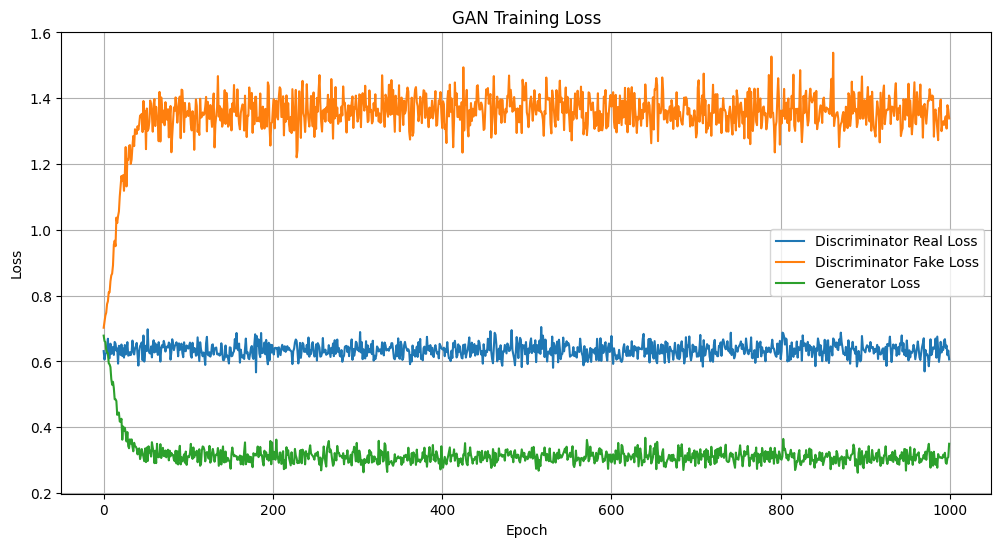

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Clear any previous TensorFlow/Keras sessions to avoid potential conflicts
keras.backend.clear_session()

# --- 1. Load Data and Perform Train-Test Split (80/20) ---
print("Loading data and performing train-test split...")
df = pd.read_csv('combined_dataset.csv')

X_original = df.drop('Label', axis=1)
y_original = df['Label']

# Perform 80/20 train-test split, stratifying by 'Label' to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# --- Save original X_test and y_test to CSV ---
X_test.to_csv('X_test_original.csv', index=False)
y_test.to_csv('y_test_original.csv', index=False)
print("Original X_test and y_test saved to 'X_test_original.csv' and 'y_test_original.csv'.")

# --- 2. Preprocess Training Data for CGAN ---
print("\nPreprocessing training data for CGAN...")
# Normalize X_train features to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)

# One-hot encode y_train labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

num_features = X_train_scaled.shape[1]
num_classes = y_train_encoded.shape[1]

print(f"Processed training data. Number of features: {num_features}, Number of classes: {num_classes}")

# --- 3. Define Model Parameters ---
latent_dim = 32  # Dimension of the random noise input to the generator
epochs = 1000   # Number of training epochs
batch_size = 32   # Size of the batches used for training

# --- 4. Define the Generator Model ---
def define_generator(latent_dim, num_classes, num_features):
    in_label = layers.Input(shape=(num_classes,))
    in_noise = layers.Input(shape=(latent_dim,))
    merge = layers.concatenate([in_noise, in_label])
    gen = layers.Dense(256)(merge)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    gen = layers.Dense(512)(gen)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    gen = layers.Dense(1024)(gen)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    out_layer = layers.Dense(num_features, activation='tanh')(gen)
    model = keras.Model([in_noise, in_label], out_layer, name='generator')
    return model

# --- 5. Define the Discriminator Model ---
def define_discriminator(num_classes, num_features):
    in_feat = layers.Input(shape=(num_features,))
    in_label = layers.Input(shape=(num_classes,))
    merge = layers.concatenate([in_feat, in_label])
    dis = layers.Dense(1024)(merge)
    dis = layers.LeakyReLU(alpha=0.2)(dis)
    dis = layers.Dropout(0.3)(dis)
    dis = layers.Dense(512)(dis)
    dis = layers.LeakyReLU(alpha=0.2)(dis)
    dis = layers.Dropout(0.3)(dis)
    dis = layers.Dense(256)(dis)
    dis = layers.LeakyReLU(alpha=0.2)(dis)
    dis = layers.Dropout(0.3)(dis)
    out_layer = layers.Dense(1, activation='sigmoid')(dis)
    model = keras.Model([in_feat, in_label], out_layer, name='discriminator')
    return model

# --- 6. Define the CGAN (Combined) Model ---
def define_gan(generator, discriminator):
    discriminator.trainable = False
    gen_noise, gen_label = generator.input
    gen_output = generator.output
    gan_output = discriminator([gen_output, gen_label])
    model = keras.Model([gen_noise, gen_label], gan_output, name='cgan')
    return model

# Create instances of the models
discriminator = define_discriminator(num_classes, num_features)
generator = define_generator(latent_dim, num_classes, num_features)
gan_model = define_gan(generator, discriminator)

# Compile the models
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                  loss='binary_crossentropy')

# print("\nGenerator Summary:")
# generator.summary()
# print("\nDiscriminator Summary:")
# discriminator.summary()
# print("\nCGAN Model Summary:")
# gan_model.summary()

# --- 7. Train the CGAN on the 80% training data ---
print("\nStarting CGAN training on 80% data...")
d_loss_real_history = []
d_loss_fake_history = []
g_loss_history = []
d_acc_real_history = []
d_acc_fake_history = []

for epoch in range(epochs):
    # --- Train Discriminator ---
    idx = np.random.randint(0, X_train_scaled.shape[0], batch_size)
    real_features = X_train_scaled[idx]
    real_labels_onehot = y_train_encoded[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_labels_idx = np.random.randint(0, num_classes, batch_size)
    fake_labels_onehot = keras.utils.to_categorical(fake_labels_idx, num_classes=num_classes)
    fake_features = generator.predict([noise, fake_labels_onehot], verbose=0)

    d_loss_real, d_acc_real = discriminator.train_on_batch([real_features, real_labels_onehot], np.ones((batch_size, 1)))
    d_loss_fake, d_acc_fake = discriminator.train_on_batch([fake_features, fake_labels_onehot], np.zeros((batch_size, 1)))

    # --- Train Generator ---
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_labels_idx = np.random.randint(0, num_classes, batch_size)
    gen_labels_onehot = keras.utils.to_categorical(gen_labels_idx, num_classes=num_classes)
    g_loss = gan_model.train_on_batch([noise, gen_labels_onehot], np.ones((batch_size, 1)))

    # Record training history
    d_loss_real_history.append(d_loss_real)
    d_loss_fake_history.append(d_loss_fake)
    g_loss_history.append(g_loss)
    d_acc_real_history.append(d_acc_real)
    d_acc_fake_history.append(d_acc_fake)

    # Print progress for each epoch
    print(f"Epoch {epoch}/{epochs} | D_loss_real: {d_loss_real:.4f}, D_acc_real: {d_acc_real:.4f} | D_loss_fake: {d_loss_fake:.4f}, D_acc_fake: {d_acc_fake:.4f} | G_loss: {g_loss:.4f}")

print("\nCGAN training complete!")

# --- 8. Generate Synthetic Samples (300 for Class 1, 300 for Class 2) ---
print("\nGenerating synthetic data...")
num_synthetic_samples_per_class = 300

# Generate for Class 1
noise_c1 = np.random.normal(0, 1, (num_synthetic_samples_per_class, latent_dim))
labels_c1_onehot = keras.utils.to_categorical([1] * num_synthetic_samples_per_class, num_classes=num_classes) # Label 1
generated_features_c1_scaled = generator.predict([noise_c1, labels_c1_onehot], verbose=0)
generated_features_c1_original = scaler.inverse_transform(generated_features_c1_scaled)
generated_labels_c1 = encoder.inverse_transform(labels_c1_onehot)[:, 0].astype(int)

# Generate for Class 2
noise_c2 = np.random.normal(0, 1, (num_synthetic_samples_per_class, latent_dim))
labels_c2_onehot = keras.utils.to_categorical([2] * num_synthetic_samples_per_class, num_classes=num_classes) # Label 2
generated_features_c2_scaled = generator.predict([noise_c2, labels_c2_onehot], verbose=0)
generated_features_c2_original = scaler.inverse_transform(generated_features_c2_scaled)
generated_labels_c2 = encoder.inverse_transform(labels_c2_onehot)[:, 0].astype(int)

# Combine synthetic features and labels
synthetic_X = np.vstack((generated_features_c1_original, generated_features_c2_original))
synthetic_y = np.hstack((generated_labels_c1, generated_labels_c2))

print(f"Generated {synthetic_X.shape[0]} synthetic samples.")

# --- 9. Augment Training Data ---
print("\nAugmenting training data...")
X_train_augmented = pd.DataFrame(np.vstack((X_train, synthetic_X)), columns=X_original.columns)
y_train_augmented = pd.Series(np.hstack((y_train, synthetic_y)), name='Label')

print(f"Augmented X_train shape: {X_train_augmented.shape}, Augmented y_train shape: {y_train_augmented.shape}")

# --- Save Augmented Training Data to CSV ---
X_train_augmented.to_csv('X_train_augmented.csv', index=False)
y_train_augmented.to_csv('y_train_augmented.csv', index=False)
print("Augmented X_train and y_train saved to 'X_train_augmented.csv' and 'y_train_augmented.csv'.")

# --- 10. Plotting Training History ---
# Plotting the loss history
plt.figure(figsize=(12, 6))
plt.plot(d_loss_real_history, label='Discriminator Real Loss')
plt.plot(d_loss_fake_history, label='Discriminator Fake Loss')
plt.plot(g_loss_history, label='Generator Loss')
plt.title('GAN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# plt.savefig('gan_loss.png')
# print("Loss plot saved as 'gan_loss.png'")

# # Plotting the accuracy history
# plt.figure(figsize=(12, 6))
# plt.plot(d_acc_real_history, label='Discriminator Real Accuracy')
# plt.plot(d_acc_fake_history, label='Discriminator Fake Accuracy')
# plt.title('Discriminator Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.savefig('discriminator_accuracy.png')
# print("Accuracy plot saved as 'discriminator_accuracy.png'")

# --- 11. Save the Trained Models ---
# try:
#     generator.save('generator_model.h5')
#     discriminator.save('discriminator_model.h5')
#     print("\nGenerator and Discriminator models saved successfully.")
# except Exception as e:
#     print(f"\nError saving models: {e}")

In [ ]:
# Og

Loading data and performing train-test split...
X_train shape: (447, 20), y_train shape: (447,)
X_test shape: (112, 20), y_test shape: (112,)
Original X_test and y_test saved to 'X_test_original.csv' and 'y_test_original.csv'.

Preprocessing training data for CGAN...
Processed training data. Number of features: 20, Number of classes: 3

Starting CGAN training on 80% data...
Epoch 0/1000 | D_loss_real: 0.6127, D_acc_real: 1.0000 | D_loss_fake: 0.6957, D_acc_fake: 0.4688 | G_loss: 0.6770
Epoch 1/1000 | D_loss_real: 0.6034, D_acc_real: 1.0000 | D_loss_fake: 0.6943, D_acc_fake: 0.4375 | G_loss: 0.6864
Epoch 2/1000 | D_loss_real: 0.6025, D_acc_real: 1.0000 | D_loss_fake: 0.6977, D_acc_fake: 0.4375 | G_loss: 0.6817
Epoch 3/1000 | D_loss_real: 0.6075, D_acc_real: 1.0000 | D_loss_fake: 0.6901, D_acc_fake: 0.5000 | G_loss: 0.6806
Epoch 4/1000 | D_loss_real: 0.6092, D_acc_real: 1.0000 | D_loss_fake: 0.6886, D_acc_fake: 0.6250 | G_loss: 0.6839
Epoch 5/1000 | D_loss_real: 0.6019, D_acc_real: 1.000

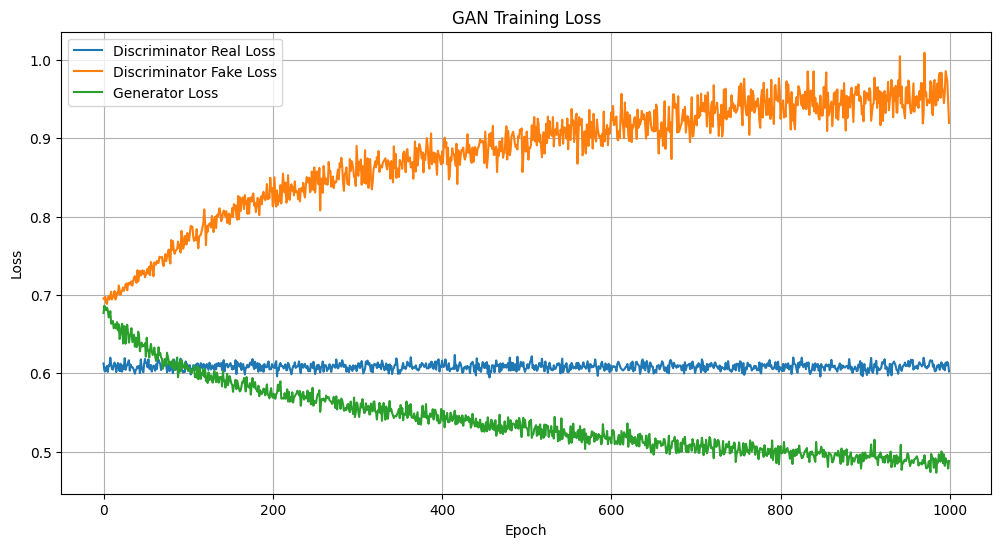

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Clear any previous TensorFlow/Keras sessions to avoid potential conflicts
# keras.backend.clear_session()

# --- 1. Load Data and Perform Train-Test Split (80/20) ---
print("Loading data and performing train-test split...")
df = pd.read_csv('combined_dataset_new.csv')

X_original = df.drop('Label', axis=1)
y_original = df['Label']

# Perform 80/20 train-test split, stratifying by 'Label' to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.2, random_state=10, stratify=y_original
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# --- Save original X_test and y_test to CSV ---
X_test.to_csv('X_test_original.csv', index=False)
y_test.to_csv('y_test_original.csv', index=False)
print("Original X_test and y_test saved to 'X_test_original.csv' and 'y_test_original.csv'.")

# --- 2. Preprocess Training Data for CGAN ---
print("\nPreprocessing training data for CGAN...")
# Normalize X_train features to the range [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)

# One-hot encode y_train labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

num_features = X_train_scaled.shape[1]
num_classes = y_train_encoded.shape[1]

print(f"Processed training data. Number of features: {num_features}, Number of classes: {num_classes}")

# --- 3. Define Model Parameters ---
latent_dim = 32  # Dimension of the random noise input to the generator
epochs = 1000   # Number of training epochs
batch_size = 32   # Size of the batches used for training

# --- 4. Define the Generator Model ---
def define_generator(latent_dim, num_classes, num_features):
    in_label = layers.Input(shape=(num_classes,))
    in_noise = layers.Input(shape=(latent_dim,))
    merge = layers.concatenate([in_noise, in_label])

    gen = layers.Dense(64)(merge)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    gen = layers.BatchNormalization()(gen)

    gen = layers.Dense(128)(merge)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    gen = layers.BatchNormalization()(gen)

    gen = layers.Dense(256)(gen)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    gen = layers.BatchNormalization()(gen)

    gen = layers.Dense(512)(gen)
    gen = layers.LeakyReLU(alpha=0.2)(gen)
    gen = layers.BatchNormalization()(gen)

    out_layer = layers.Dense(num_features, activation='tanh')(gen)
    model = keras.Model([in_noise, in_label], out_layer, name='generator')
    return model

# --- 5. Define the Discriminator Model ---
def define_discriminator(num_classes, num_features):
    in_feat = layers.Input(shape=(num_features,))
    in_label = layers.Input(shape=(num_classes,))
    merge = layers.concatenate([in_feat, in_label])

    dis = layers.Dense(512)(merge)
    dis = layers.LeakyReLU(alpha=0.2)(dis)
    dis = layers.BatchNormalization()(dis)

    dis = layers.Dense(256)(dis)
    dis = layers.LeakyReLU(alpha=0.2)(dis)
    dis = layers.BatchNormalization()(dis)

    dis = layers.Dense(128)(dis)
    dis = layers.LeakyReLU(alpha=0.2)(dis)
    dis = layers.BatchNormalization()(dis)

    out_layer = layers.Dense(1, activation='sigmoid')(dis)
    model = keras.Model([in_feat, in_label], out_layer, name='discriminator')
    return model

# --- 6. Define the CGAN (Combined) Model ---
def define_gan(generator, discriminator):
    discriminator.trainable = False
    gen_noise, gen_label = generator.input
    gen_output = generator.output
    gan_output = discriminator([gen_output, gen_label])
    model = keras.Model([gen_noise, gen_label], gan_output, name='cgan')
    return model

# Create instances of the models
discriminator = define_discriminator(num_classes, num_features)
generator = define_generator(latent_dim, num_classes, num_features)
gan_model = define_gan(generator, discriminator)

# Compile the models
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                      loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy')

# print("\nGenerator Summary:")
# generator.summary()
# print("\nDiscriminator Summary:")
# discriminator.summary()
# print("\nCGAN Model Summary:")
# gan_model.summary()

# --- 7. Train the CGAN on the 80% training data ---
print("\nStarting CGAN training on 80% data...")
d_loss_real_history = []
d_loss_fake_history = []
g_loss_history = []
d_acc_real_history = []
d_acc_fake_history = []

for epoch in range(epochs):
    # --- Train Discriminator ---
    idx = np.random.randint(0, X_train_scaled.shape[0], batch_size)
    real_features = X_train_scaled[idx]
    real_labels_onehot = y_train_encoded[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_labels_idx = np.random.randint(0, num_classes, batch_size)
    fake_labels_onehot = keras.utils.to_categorical(fake_labels_idx, num_classes=num_classes)
    fake_features = generator.predict([noise, fake_labels_onehot], verbose=0)

    d_loss_real, d_acc_real = discriminator.train_on_batch([real_features, real_labels_onehot], np.ones((batch_size, 1)))
    d_loss_fake, d_acc_fake = discriminator.train_on_batch([fake_features, fake_labels_onehot], np.zeros((batch_size, 1)))

    # --- Train Generator ---
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_labels_idx = np.random.randint(0, num_classes, batch_size)
    gen_labels_onehot = keras.utils.to_categorical(gen_labels_idx, num_classes=num_classes)
    g_loss = gan_model.train_on_batch([noise, gen_labels_onehot], np.ones((batch_size, 1)))

    # Record training history
    d_loss_real_history.append(d_loss_real)
    d_loss_fake_history.append(d_loss_fake)
    g_loss_history.append(g_loss)
    d_acc_real_history.append(d_acc_real)
    d_acc_fake_history.append(d_acc_fake)

    # Print progress for each epoch
    print(f"Epoch {epoch}/{epochs} | D_loss_real: {d_loss_real:.4f}, D_acc_real: {d_acc_real:.4f} | D_loss_fake: {d_loss_fake:.4f}, D_acc_fake: {d_acc_fake:.4f} | G_loss: {g_loss:.4f}")

print("\nCGAN training complete!")

# --- 8. Generate Synthetic Samples (300 for Class 1, 300 for Class 2) ---
print("\nGenerating synthetic data...")
# num_synthetic_samples_per_class0= 300
# num_synthetic_samples_per_class1 = 500
# num_synthetic_samples_per_class2 = 500



# # Generate for Class 0
# noise_c0 = np.random.normal(0, 1, (num_synthetic_samples_per_class0, latent_dim))
# labels_c0_onehot = keras.utils.to_categorical([0] * num_synthetic_samples_per_class0, num_classes=num_classes) # Label 0
# generated_features_c0_scaled = generator.predict([noise_c0, labels_c0_onehot], verbose=0)
# generated_features_c0_original = scaler.inverse_transform(generated_features_c0_scaled)
# generated_labels_c0 = encoder.inverse_transform(labels_c0_onehot)[:, 0].astype(int)

# # Generate for Class 1
# noise_c1 = np.random.normal(0, 1, (num_synthetic_samples_per_class1, latent_dim))
# labels_c1_onehot = keras.utils.to_categorical([1] * num_synthetic_samples_per_class1, num_classes=num_classes) # Label 1
# generated_features_c1_scaled = generator.predict([noise_c1, labels_c1_onehot], verbose=0)
# generated_features_c1_original = scaler.inverse_transform(generated_features_c1_scaled)
# generated_labels_c1 = encoder.inverse_transform(labels_c1_onehot)[:, 0].astype(int)

# # Generate for Class 2
# noise_c2 = np.random.normal(0, 1, (num_synthetic_samples_per_class2, latent_dim))
# labels_c2_onehot = keras.utils.to_categorical([2] * num_synthetic_samples_per_class2, num_classes=num_classes) # Label 2
# generated_features_c2_scaled = generator.predict([noise_c2, labels_c2_onehot], verbose=0)
# generated_features_c2_original = scaler.inverse_transform(generated_features_c2_scaled)
# generated_labels_c2 = encoder.inverse_transform(labels_c2_onehot)[:, 0].astype(int)

# # Combine synthetic features and labels
# synthetic_X = np.vstack((generated_features_c0_original,generated_features_c1_original, generated_features_c2_original))
# synthetic_y = np.hstack((generated_labels_c0,generated_labels_c1, generated_labels_c2))

# print(f"Generated {synthetic_X.shape[0]} synthetic samples.")

# # --- 9. Augment Training Data ---
# print("\nAugmenting training data...")
# X_train_augmented = pd.DataFrame(np.vstack((X_train, synthetic_X)), columns=X_original.columns)
# y_train_augmented = pd.Series(np.hstack((y_train, synthetic_y)), name='Label')



# print(f"Augmented X_train shape: {X_train_augmented.shape}, Augmented y_train shape: {y_train_augmented.shape}")

# # --- Save Augmented Training Data to CSV ---
# X_train_augmented.to_csv('X_train_augmented.csv', index=False)
# y_train_augmented.to_csv('y_train_augmented.csv', index=False)
# print("Augmented X_train and y_train saved to 'X_train_augmented.csv' and 'y_train_augmented.csv'.")

# --- 10. Plotting Training History ---
# Plotting the loss history
plt.figure(figsize=(12, 6))
plt.plot(d_loss_real_history, label='Discriminator Real Loss')
plt.plot(d_loss_fake_history, label='Discriminator Fake Loss')
plt.plot(g_loss_history, label='Generator Loss')
plt.title('GAN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
# plt.savefig('gan_loss.png')
# print("Loss plot saved as 'gan_loss.png'")

# # Plotting the accuracy history
# plt.figure(figsize=(12, 6))
# plt.plot(d_acc_real_history, label='Discriminator Real Accuracy')
# plt.plot(d_acc_fake_history, label='Discriminator Fake Accuracy')
# plt.title('Discriminator Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.savefig('discriminator_accuracy.png')
# print("Accuracy plot saved as 'discriminator_accuracy.png'")

# --- 11. Save the Trained Models ---
# try:
#     generator.save('generator_model.h5')
#     discriminator.save('discriminator_model.h5')
#     print("\nGenerator and Discriminator models saved successfully.")
# except Exception as e:
#     print(f"\nError saving models: {e}")

In [11]:
X_train_augmented.round(2).to_csv('X_train_augmented.csv', index=False)
X_train_augmented[['Gender', 'Age','HR','SPO2','maxBP','minBP']].round().to_csv('X_train_augmented2.csv', index=False)

In [ ]:
num_synthetic_samples_per_class = 300

# Generate for Class 1
noise_c1 = np.random.normal(0, 1, (num_synthetic_samples_per_class, latent_dim))
labels_c1_onehot = keras.utils.to_categorical([1] * num_synthetic_samples_per_class, num_classes=num_classes) # Label 1
generated_features_c1_scaled = generator.predict([noise_c1, labels_c1_onehot], verbose=0)
generated_features_c1_original = scaler.inverse_transform(generated_features_c1_scaled)
generated_labels_c1 = encoder.inverse_transform(labels_c1_onehot)[:, 0].astype(int)

# Generate for Class 2
noise_c2 = np.random.normal(0, 1, (num_synthetic_samples_per_class, latent_dim))
labels_c2_onehot = keras.utils.to_categorical([2] * num_synthetic_samples_per_class, num_classes=num_classes) # Label 2
generated_features_c2_scaled = generator.predict([noise_c2, labels_c2_onehot], verbose=0)
generated_features_c2_original = scaler.inverse_transform(generated_features_c2_scaled)
generated_labels_c2 = encoder.inverse_transform(labels_c2_onehot)[:, 0].astype(int)

# Combine synthetic features and labels
synthetic_X = np.vstack((generated_features_c1_original, generated_features_c2_original))
synthetic_y = np.hstack((generated_labels_c1, generated_labels_c2))

print(f"Generated {synthetic_X.shape[0]} synthetic samples.")

# --- 9. Augment Training Data ---
print("\nAugmenting training data...")
X_train_augmented = pd.DataFrame(np.vstack((X_train, synthetic_X)), columns=X_original.columns)
y_train_augmented = pd.Series(np.hstack((y_train, synthetic_y)), name='Label')

print(f"Augmented X_train shape: {X_train_augmented.shape}, Augmented y_train shape: {y_train_augmented.shape}")

# --- Save Augmented Training Data to CSV ---
X_train_augmented.round(2).to_csv('X_train_augmented.csv', index=False)
y_train_augmented.to_csv('y_train_augmented.csv', index=False)
print("Augmented X_train and y_train saved to 'X_train_augmented.csv' and 'y_train_augmented.csv'.")

Generated 600 synthetic samples.

Augmenting training data...
Augmented X_train shape: (1047, 20), Augmented y_train shape: (1047,)
Augmented X_train and y_train saved to 'X_train_augmented.csv' and 'y_train_augmented.csv'.


Loading data and performing train-test split...
X_train shape: (447, 60), y_train shape: (447,)
X_test shape: (112, 60), y_test shape: (112,)
Original X_test and y_test saved to 'X_test_original.csv' and 'y_test_original.csv'.

Preprocessing training data for CGAN...
Processed training data. Number of features: 60, Number of classes: 3

Generator Summary:
Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 generator_noise_input (InputLa  [(None, 100)]       0           []                               
 yer)                                                                                             
                                                                                                  
 generator_label_input (InputLa  [(None, 3)]         0           []                               
 yer)                        

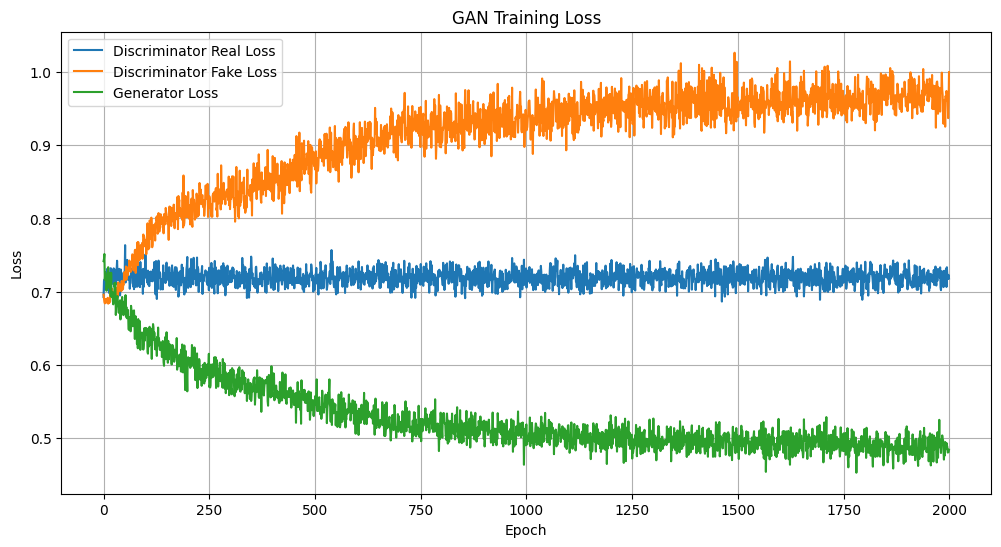

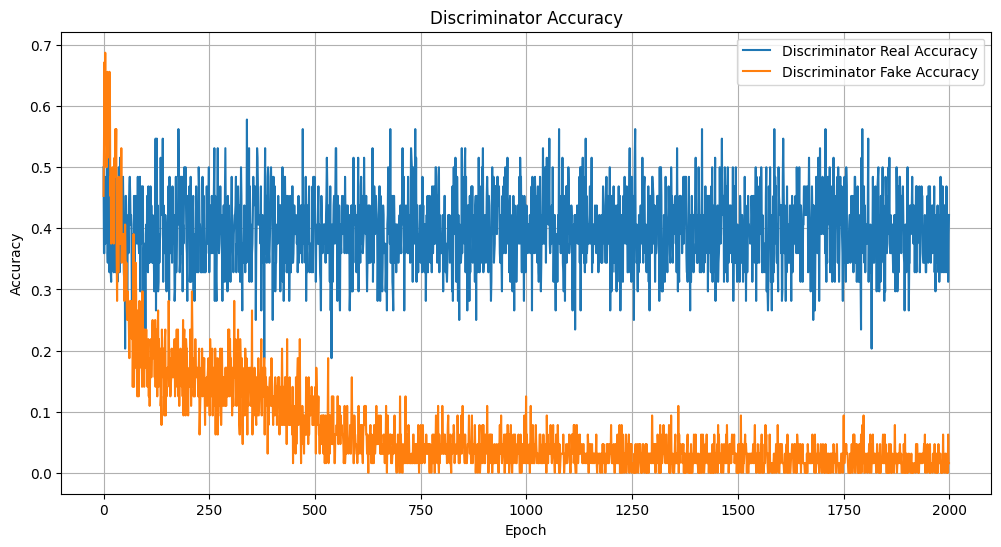

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# import matplotlib.pyplot as plt

# # It's good practice to clear the Keras session for a fresh start,
# # though in some persistent environments, this might not fully reset everything.
# keras.backend.clear_session()

# # --- 1. Load Data and Perform Train-Test Split (80/20) ---
# print("Loading data and performing train-test split...")
# try:
#     df = pd.read_csv('combined_dataset.csv')
# except FileNotFoundError:
#     print("Error: 'combined_dataset.csv' not found. Please ensure the file is in the same directory.")
#     exit() # Exit if the file isn't found

# X_original = df.drop('Label', axis=1)
# y_original = df['Label']

# # Perform 80/20 train-test split, stratifying by 'Label' to maintain class distribution
# X_train, X_test, y_train, y_test = train_test_split(
#     X_original, y_original, test_size=0.2, random_state=42, stratify=y_original
# )

# print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# # --- Save original X_test and y_test to CSV ---
# X_test.to_csv('X_test_original.csv', index=False)
# y_test.to_csv('y_test_original.csv', index=False)
# print("Original X_test and y_test saved to 'X_test_original.csv' and 'y_test_original.csv'.")

# # --- 2. Preprocess Training Data for CGAN ---
# print("\nPreprocessing training data for CGAN...")
# # Normalize X_train features to the range [-1, 1]
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_train_scaled = scaler.fit_transform(X_train)

# # One-hot encode y_train labels
# encoder = OneHotEncoder(sparse_output=False)
# y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# num_features = X_train_scaled.shape[1]
# num_classes = y_train_encoded.shape[1]

# print(f"Processed training data. Number of features: {num_features}, Number of classes: {num_classes}")

# # --- 3. Define Model Parameters ---
# latent_dim = 100  # Dimension of the random noise input to the generator
# epochs = 2000   # Increased epochs for better training
# batch_size = 64   # Size of the batches used for training
# learning_rate = 0.0003 # Slightly increased learning rate

# # --- 4. Define the Generator Model ---
# def define_generator(latent_dim, num_classes, num_features):
#     in_label = layers.Input(shape=(num_classes,), name='generator_label_input')
#     in_noise = layers.Input(shape=(latent_dim,), name='generator_noise_input')
    
#     merge = layers.concatenate([in_noise, in_label])
    
#     gen = layers.Dense(256)(merge)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.BatchNormalization()(gen) # Added BatchNormalization
    
#     gen = layers.Dense(512)(gen)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.BatchNormalization()(gen) # Added BatchNormalization
    
#     gen = layers.Dense(1024)(gen)
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.BatchNormalization()(gen) # Added BatchNormalization

#     gen = layers.Dense(2048)(gen) # Added new layer
#     gen = layers.LeakyReLU(alpha=0.2)(gen)
#     gen = layers.BatchNormalization()(gen) # Added BatchNormalization
    
#     out_layer = layers.Dense(num_features, activation='tanh')(gen) # Output features in [-1, 1] range
#     model = keras.Model([in_noise, in_label], out_layer, name='generator')
#     return model

# # --- 5. Define the Discriminator Model ---
# def define_discriminator(num_classes, num_features):
#     in_feat = layers.Input(shape=(num_features,), name='discriminator_feature_input')
#     in_label = layers.Input(shape=(num_classes,), name='discriminator_label_input')
    
#     merge = layers.concatenate([in_feat, in_label])
    
#     dis = layers.Dense(2048)(merge) # Increased neurons
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.BatchNormalization()(dis) # Added BatchNormalization
    
#     dis = layers.Dense(1024)(dis)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.BatchNormalization()(dis) # Added BatchNormalization
    
#     dis = layers.Dense(512)(dis)
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.BatchNormalization()(dis) # Added BatchNormalization

#     dis = layers.Dense(256)(dis) # Added new layer
#     dis = layers.LeakyReLU(alpha=0.2)(dis)
#     dis = layers.Dropout(0.3)(dis)
#     dis = layers.BatchNormalization()(dis) # Added BatchNormalization
    
#     out_layer = layers.Dense(1, activation='sigmoid')(dis) # Binary classification (real/fake)
#     model = keras.Model([in_feat, in_label], out_layer, name='discriminator')
#     return model

# # --- 6. Define the CGAN (Combined) Model ---
# def define_gan(generator, discriminator):
#     discriminator.trainable = False # Discriminator is not trained during GAN training
#     gen_noise, gen_label = generator.input
#     gen_output = generator.output
#     gan_output = discriminator([gen_output, gen_label])
#     model = keras.Model([gen_noise, gen_label], gan_output, name='cgan')
#     return model

# # Create instances of the models
# discriminator = define_discriminator(num_classes, num_features)
# generator = define_generator(latent_dim, num_classes, num_features)
# gan_model = define_gan(generator, discriminator)

# # Compile the models
# # Using Adam optimizer with a slightly adjusted learning rate
# discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.5),
#                       loss='binary_crossentropy', metrics=['accuracy'])
# gan_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.5),
#                   loss='binary_crossentropy')

# print("\nGenerator Summary:")
# generator.summary()
# print("\nDiscriminator Summary:")
# discriminator.summary()
# print("\nCGAN Model Summary:")
# gan_model.summary()

# # --- 7. Train the CGAN on the 80% training data ---
# print(f"\nStarting CGAN training on 80% data for {epochs} epochs...")
# d_loss_real_history = []
# d_loss_fake_history = []
# g_loss_history = []
# d_acc_real_history = []
# d_acc_fake_history = []

# for epoch in range(epochs):
#     # --- Train Discriminator ---
#     # Select a random batch of real data from the scaled training set
#     idx = np.random.randint(0, X_train_scaled.shape[0], batch_size)
#     real_features = X_train_scaled[idx]
#     real_labels_onehot = y_train_encoded[idx]

#     # Generate a batch of fake data
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     # Generate random labels for the fake data
#     fake_labels_idx = np.random.randint(0, num_classes, batch_size)
#     fake_labels_onehot = keras.utils.to_categorical(fake_labels_idx, num_classes=num_classes)
#     fake_features = generator.predict([noise, fake_labels_onehot], verbose=0)

#     # Train the discriminator on real samples (label 1) and fake samples (label 0)
#     d_loss_real, d_acc_real = discriminator.train_on_batch([real_features, real_labels_onehot], np.ones((batch_size, 1)))
#     d_loss_fake, d_acc_fake = discriminator.train_on_batch([fake_features, fake_labels_onehot], np.zeros((batch_size, 1)))

#     # --- Train Generator ---
#     # Generate random noise and labels for generator input
#     noise = np.random.normal(0, 1, (batch_size, latent_dim))
#     # Generate random labels for the generator to create data for
#     gen_labels_idx = np.random.randint(0, num_classes, batch_size)
#     gen_labels_onehot = keras.utils.to_categorical(gen_labels_idx, num_classes=num_classes)

#     # Train the generator (via the combined GAN model)
#     # The generator tries to make the discriminator classify its output as real (label 1)
#     g_loss = gan_model.train_on_batch([noise, gen_labels_onehot], np.ones((batch_size, 1)))

#     # Record losses and accuracies
#     d_loss_real_history.append(d_loss_real)
#     d_loss_fake_history.append(d_loss_fake)
#     g_loss_history.append(g_loss)
#     d_acc_real_history.append(d_acc_real)
#     d_acc_fake_history.append(d_acc_fake)

#     # Print progress every 1000 epochs
#     if epoch % 1000 == 0 or epoch == epochs - 1: # Also print at the last epoch
#         print(f"Epoch {epoch}/{epochs} | D_loss_real: {d_loss_real:.4f}, D_acc_real: {d_acc_real:.4f} | D_loss_fake: {d_loss_fake:.4f}, D_acc_fake: {d_acc_fake:.4f} | G_loss: {g_loss:.4f}")

# print("\nCGAN training complete!")

# # --- 8. Generate Synthetic Samples (300 for Class 1, 300 for Class 2) ---
# print("\nGenerating synthetic data...")
# num_synthetic_samples_per_class = 300

# # Generate for Class 1 (assuming Label 1 corresponds to index 1 after one-hot encoding, adjust if labels are 0-indexed)
# # If your labels are 1 and 2, and encoder fits them, then label 1 would be index 0 and label 2 would be index 1.
# # I'll assume your raw labels are 1 and 2, and they map to 0 and 1 in one-hot encoding.
# # You might need to adjust the index [1] and [2] if your original labels are different.
# class_1_label_index = 0 # Assuming '1' is encoded as the first class (index 0)
# class_2_label_index = 1 # Assuming '2' is encoded as the second class (index 1)

# # Generate for Class 1
# noise_c1 = np.random.normal(0, 1, (num_synthetic_samples_per_class, latent_dim))
# labels_c1_onehot = keras.utils.to_categorical([class_1_label_index] * num_synthetic_samples_per_class, num_classes=num_classes)
# generated_features_c1_scaled = generator.predict([noise_c1, labels_c1_onehot], verbose=0)
# generated_features_c1_original = scaler.inverse_transform(generated_features_c1_scaled)
# generated_labels_c1 = encoder.inverse_transform(labels_c1_onehot)[:, 0].astype(int)

# # Generate for Class 2
# noise_c2 = np.random.normal(0, 1, (num_synthetic_samples_per_class, latent_dim))
# labels_c2_onehot = keras.utils.to_categorical([class_2_label_index] * num_synthetic_samples_per_class, num_classes=num_classes)
# generated_features_c2_scaled = generator.predict([noise_c2, labels_c2_onehot], verbose=0)
# generated_features_c2_original = scaler.inverse_transform(generated_features_c2_scaled)
# generated_labels_c2 = encoder.inverse_transform(labels_c2_onehot)[:, 0].astype(int)

# # Combine synthetic features and labels
# synthetic_X = np.vstack((generated_features_c1_original, generated_features_c2_original))
# synthetic_y = np.hstack((generated_labels_c1, generated_labels_c2))

# print(f"Generated {synthetic_X.shape[0]} synthetic samples ({num_synthetic_samples_per_class} for class {encoder.inverse_transform(keras.utils.to_categorical([class_1_label_index], num_classes=num_classes))[0][0]} and {num_synthetic_samples_per_class} for class {encoder.inverse_transform(keras.utils.to_categorical([class_2_label_index], num_classes=num_classes))[0][0]}).")


# # --- 9. Augment Training Data ---
# print("\nAugmenting training data...")
# X_train_augmented = pd.DataFrame(np.vstack((X_train, synthetic_X)), columns=X_original.columns)
# y_train_augmented = pd.Series(np.hstack((y_train, synthetic_y)), name='Label')

# print(f"Augmented X_train shape: {X_train_augmented.shape}, Augmented y_train shape: {y_train_augmented.shape}")

# # --- Save Augmented Training Data to CSV ---
# X_train_augmented.to_csv('X_train_augmented.csv', index=False)
# y_train_augmented.to_csv('y_train_augmented.csv', index=False)
# print("Augmented X_train and y_train saved to 'X_train_augmented.csv' and 'y_train_augmented.csv'.")

# # --- 10. Plotting Training History ---
# # Plotting the loss history
# plt.figure(figsize=(12, 6))
# plt.plot(d_loss_real_history, label='Discriminator Real Loss')
# plt.plot(d_loss_fake_history, label='Discriminator Fake Loss')
# plt.plot(g_loss_history, label='Generator Loss')
# plt.title('GAN Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.savefig('gan_loss.png')
# print("Loss plot saved as 'gan_loss.png'")

# # Plotting the accuracy history
# plt.figure(figsize=(12, 6))
# plt.plot(d_acc_real_history, label='Discriminator Real Accuracy')
# plt.plot(d_acc_fake_history, label='Discriminator Fake Accuracy')
# plt.title('Discriminator Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.savefig('discriminator_accuracy.png')
# print("Accuracy plot saved as 'discriminator_accuracy.png'")

# # --- 11. Save the Trained Models ---
# try:
#     generator.save('generator_model.h5')
#     discriminator.save('discriminator_model.h5')
#     print("\nGenerator and Discriminator models saved successfully.")
# except Exception as e:
#     print(f"\nError saving models: {e}")